# 0.0. IMPORTS

In [84]:
import pandas as pd   
import inflection
import math
import numpy as np
import seaborn as sns
from IPython.core.display import HTML
from IPython.display       import Image
from sklearn import preprocessing as pp
from sklearn import model_selection as ms
from sklearn import ensemble as en

## 0.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
jupyter_settings()

def annotate_plot(ax, width, height):
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + width, p.get_height() + height))

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading data

In [3]:
#low_memory = False fala pra função read csv ler todo o arquivo de uma vez só para a memoria
df_insurance_raw = pd.read_csv('../Datasets/raw/train.csv',low_memory= False)

# 1.0. DATA DESCRIPTION

In [4]:
df1 = df_insurance_raw.copy()

## 1.1. Rename Columns

In [5]:
df1.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [6]:
cols_old = ['Id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response']

snakecase = lambda x: inflection.underscore(x)
cols_new = list (map(snakecase,cols_old))

#rename
df1.columns = cols_new
df1.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

## 1.2. Data Dimensions

In [7]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 381109
Number of Cols: 12


## 1.3. Data Types

In [8]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

In [9]:
df1.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## 1.4. Check NA

In [10]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 1.5. Fillout NA

## 1.6. Change Types

In [11]:
# df1['id'] = df1['id'].astype('string')
# df1['gender'] = df1['gender'].astype('string')
# #df1['driving_license'] = df1['driving_license'].astype('string')
# #df1['previously_insured'] = df1['previously_insured'].astype('string')
# df1['vehicle_damage'] = df1['vehicle_damage'].astype('string')
# df1['policy_sales_channel'] = df1['policy_sales_channel'].astype('int')
# df1['policy_sales_channel'] = df1['policy_sales_channel'].astype('string')
# df1['region_code'] = df1['region_code'].astype('int')
# df1['region_code'] = df1['region_code'].astype('string')
# #df1['response'] = df1['response'].astype('string')
# df1.dtypes

### 1.6. Mapping Values

In [12]:
#df1['vehicle_damage'] = df1['vehicle_damage'].map({'Yes': '1', 'No': '0'})
#df1['vehicle_damage'] = df1['vehicle_damage'].astype('string')

In [13]:
df1['vehicle_age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [14]:
#df1['vehicle_age'] = df1['vehicle_age'].map({'< 1 Year': '0', '1-2 Year': '1','> 2 Years': '2'})
#df1['vehicle_age'] = df1['vehicle_age'].astype('string')

## 1.7. Descriptive Statistical

In [15]:
df1.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [16]:
num_attributes = df1.select_dtypes(include = ['int64','float64'])
cat_attributes = df1.select_dtypes(exclude = ['int64','float64','datetime64[ns]'])

### 1.7.1 Numerical Attributes

In [17]:
#Central Tendency - mean, median

ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#concatenate
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attribute','min','max','range','mean','median','std','skew','kurtosis']
m

,attribute,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
1,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
2,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
3,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
4,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
5,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
6,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
7,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
8,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788


In [18]:
cat_attributes.head()

,gender,vehicle_age,vehicle_damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No


### 1.7.2 Categorical Attributes

In [19]:
cat_attributes.apply(lambda x: x.unique().shape[0])

gender            2
vehicle_age       3
vehicle_damage    2
dtype: int64

In [20]:
cat_attributes.describe()

,gender,vehicle_age,vehicle_damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [21]:
#sns.boxplot(x='age', y='response',data=df1)

<Axes: xlabel='response', ylabel='annual_premium'>

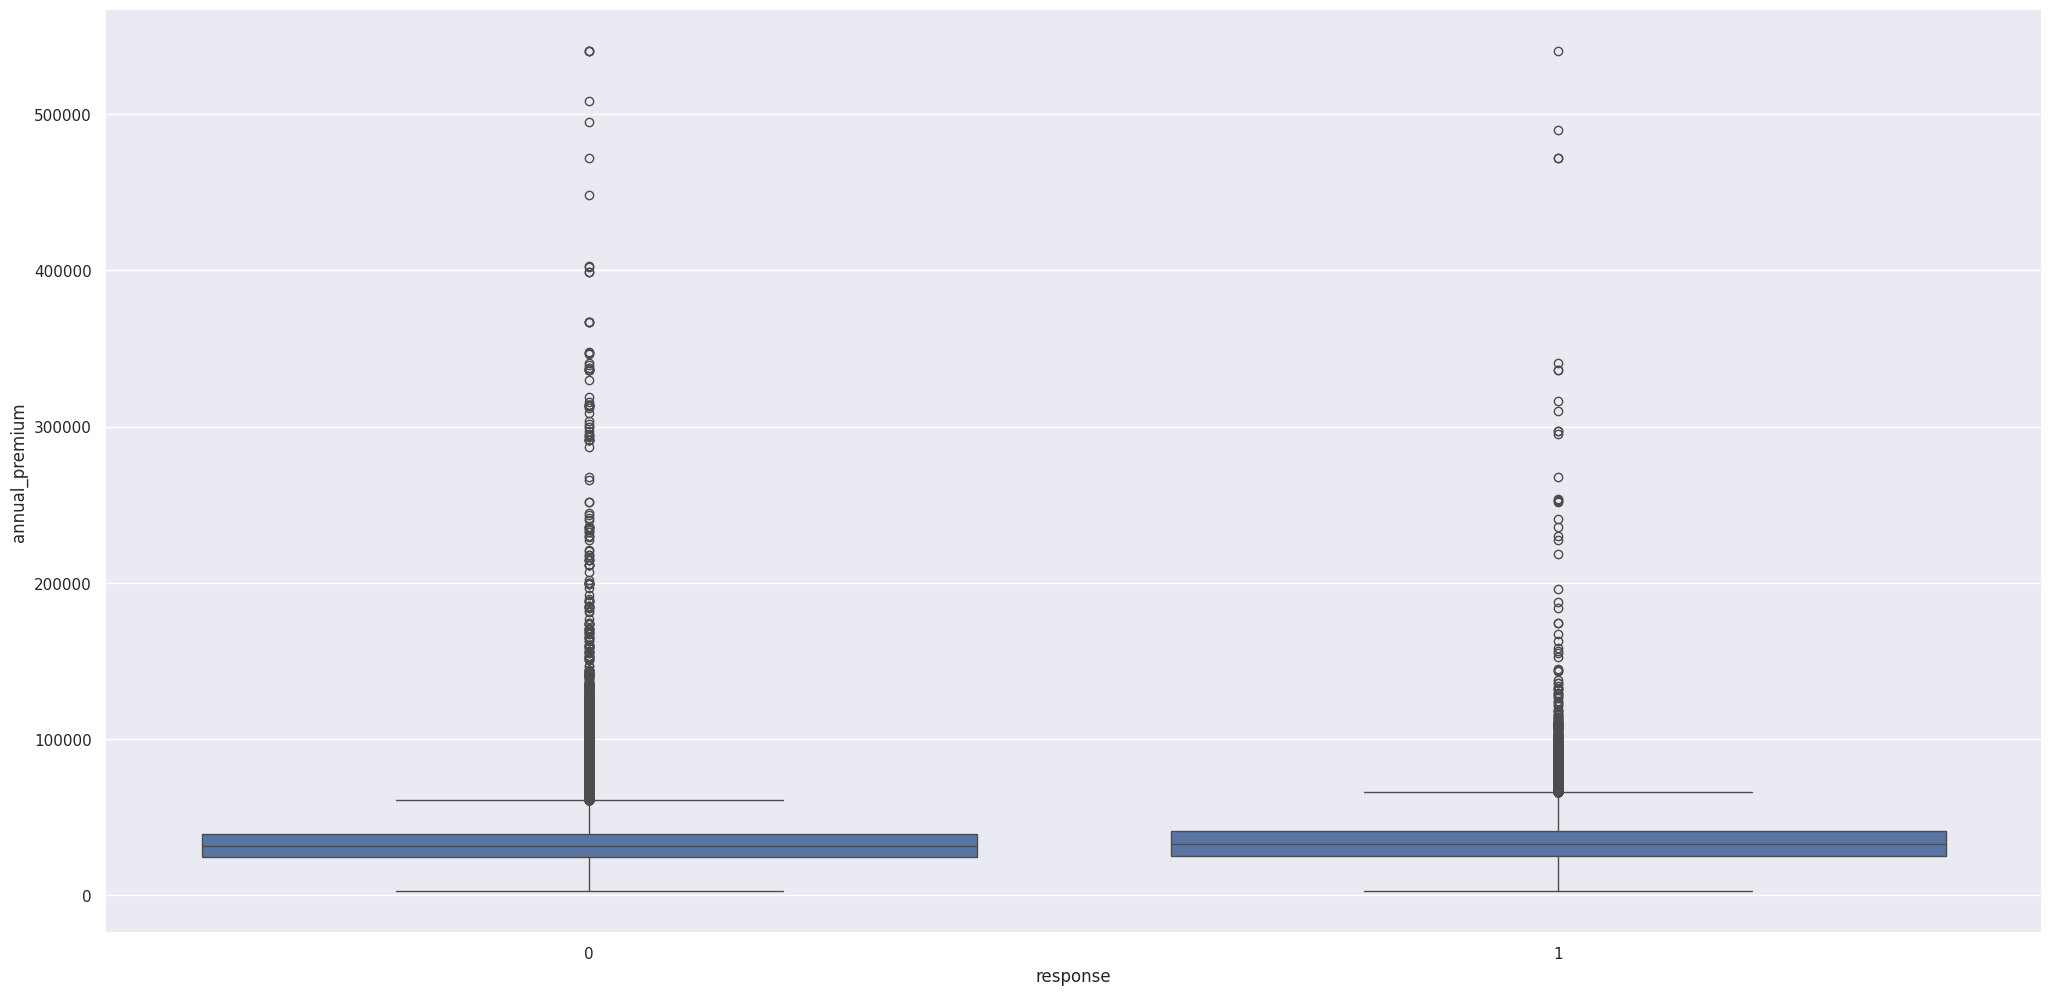

In [22]:
sns.boxplot(y='annual_premium', x='response',data=df1)

In [23]:
aux1= df1[df1['response']=='1']

<Axes: xlabel='age', ylabel='Count'>

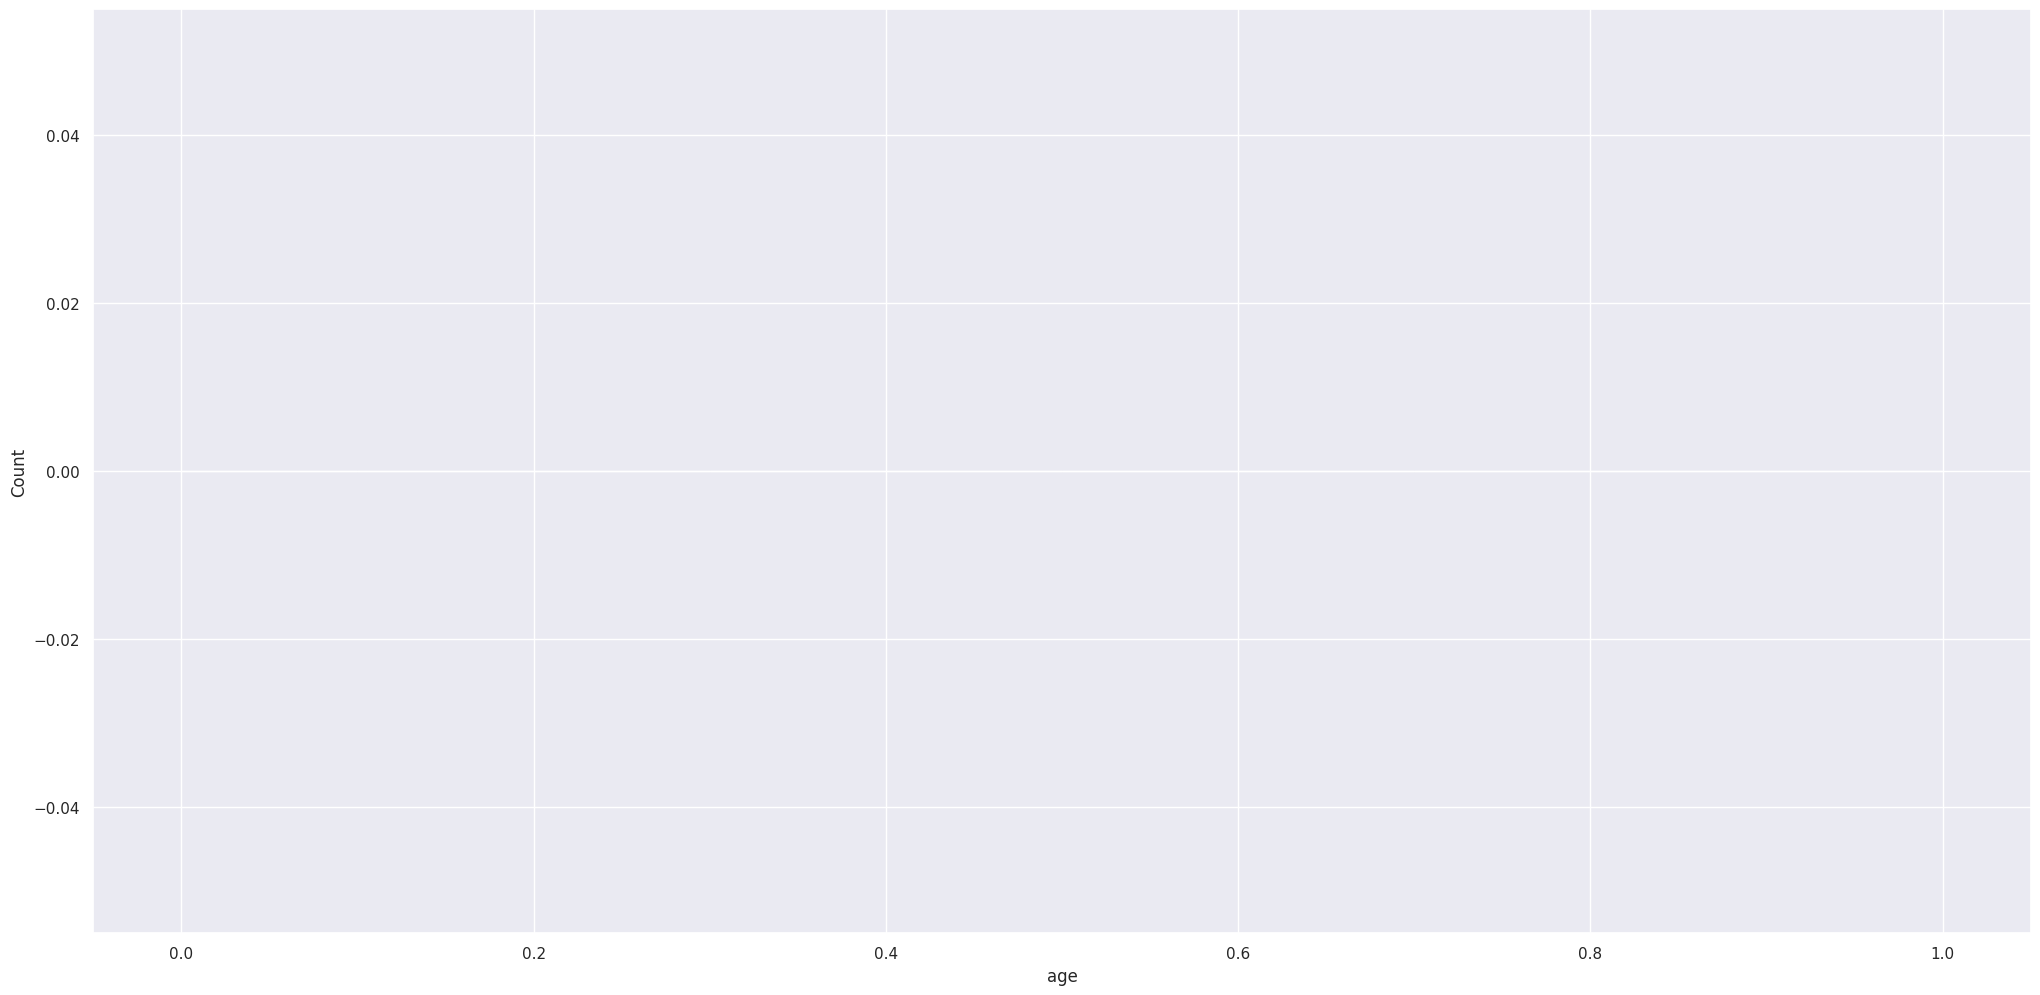

In [24]:
sns.histplot(data = aux1, x = "age", kde = True,bins=10)

<Axes: xlabel='annual_premium', ylabel='Count'>

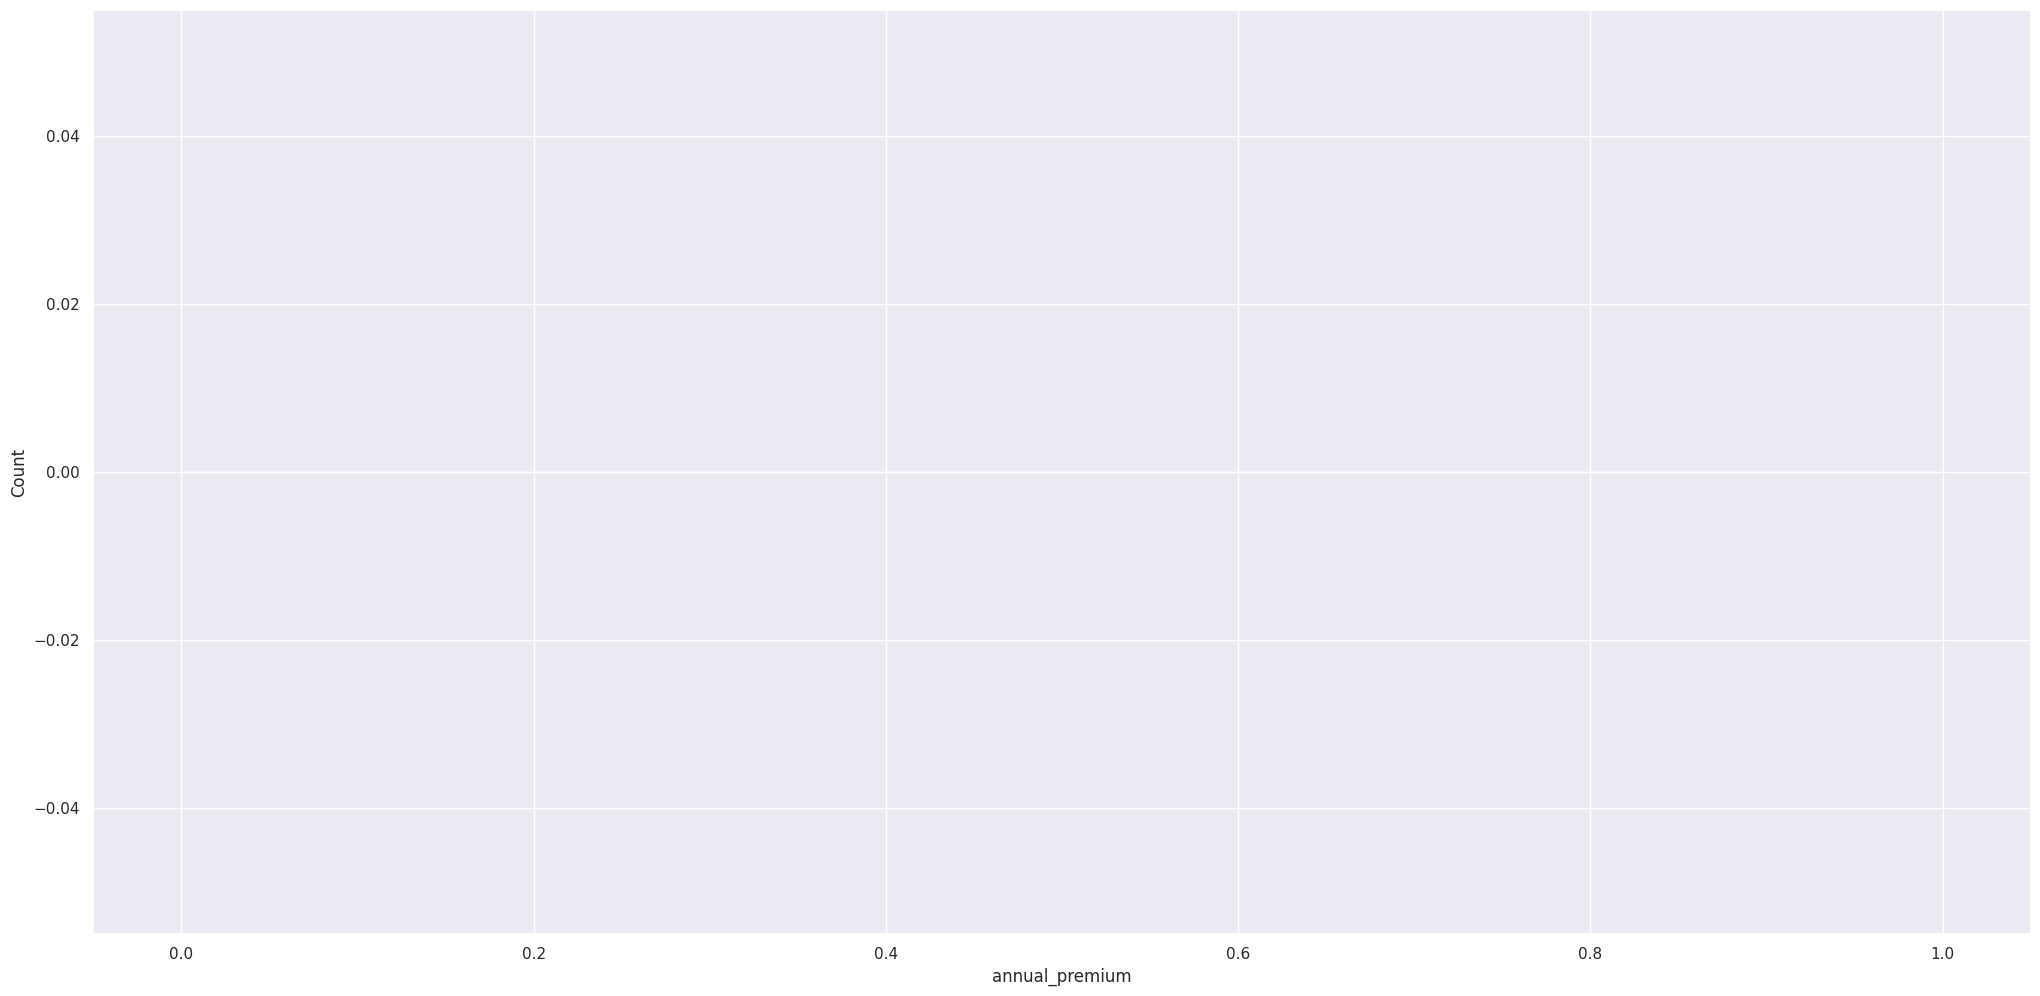

In [25]:
sns.histplot(data = aux1, x = "annual_premium", kde = True,bins=2)

/tmp/ipykernel_61104/22261754.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df1, y = 'gender', palette='colorblind',orient='y',ax = axs[0, 0]);
/tmp/ipykernel_61104/22261754.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df1, y = 'driving_license', palette='colorblind',orient='y',ax = axs[0, 1]);
/tmp/ipykernel_61104/22261754.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df1, y = 'vehicle_age', palette='colorblind',orient='y',ax = axs[1, 0]);
/tmp/ipykernel_61104/22261754.py:20: Fut

[Text(0, 0, '12.3%')]

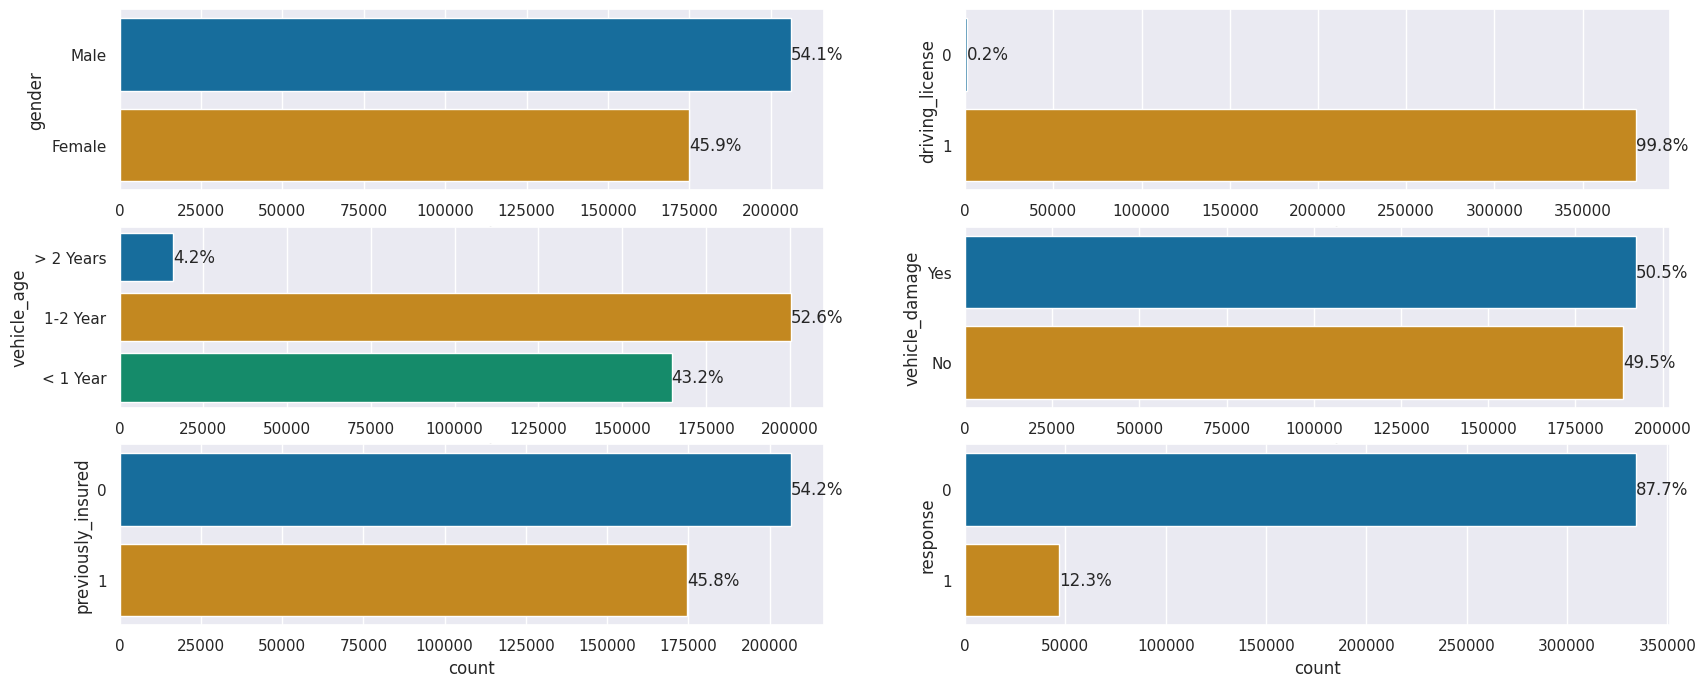

In [26]:
fig, axs = plt.subplots(3, 2, figsize = (20, 8))
#------------axs[0, 0]-----------------------------------------------------------------------------------------
ax = sns.countplot(data = df1, y = 'gender', palette='colorblind',orient='y',ax = axs[0, 0]);
total = df1['response'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
ax.bar_label(ax.containers[1], fmt=lambda x: f'{(x/total)*100:0.1f}%')
#------------axs[0, 1]-----------------------------------------------------------------------------------------

ax = sns.countplot(data = df1, y = 'driving_license', palette='colorblind',orient='y',ax = axs[0, 1]);
total = df1['response'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
ax.bar_label(ax.containers[1], fmt=lambda x: f'{(x/total)*100:0.1f}%')
#------------axs[1, 0]-----------------------------------------------------------------------------------------
ax = sns.countplot(data = df1, y = 'vehicle_age', palette='colorblind',orient='y',ax = axs[1, 0]);
total = df1['response'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
ax.bar_label(ax.containers[1], fmt=lambda x: f'{(x/total)*100:0.1f}%')
ax.bar_label(ax.containers[2], fmt=lambda x: f'{(x/total)*100:0.1f}%')
#------------axs[1, 1]-----------------------------------------------------------------------------------------
ax = sns.countplot(data = df1, y = 'vehicle_damage', palette='colorblind',orient='y',ax = axs[1, 1]);
total = df1['response'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
ax.bar_label(ax.containers[1], fmt=lambda x: f'{(x/total)*100:0.1f}%')
#------------axs[2, 0]-----------------------------------------------------------------------------------------
ax = sns.countplot(data = df1, y = 'previously_insured', palette='colorblind',orient='y',ax = axs[2, 0]);
total = df1['response'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
ax.bar_label(ax.containers[1], fmt=lambda x: f'{(x/total)*100:0.1f}%')
#------------axs[2, 1]-----------------------------------------------------------------------------------------
ax = sns.countplot(data = df1, y = 'response', palette='colorblind',orient='y',ax = axs[2, 1]);
total = df1['response'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
ax.bar_label(ax.containers[1], fmt=lambda x: f'{(x/total)*100:0.1f}%')

# 2.0. FEATURE ENGINEERING

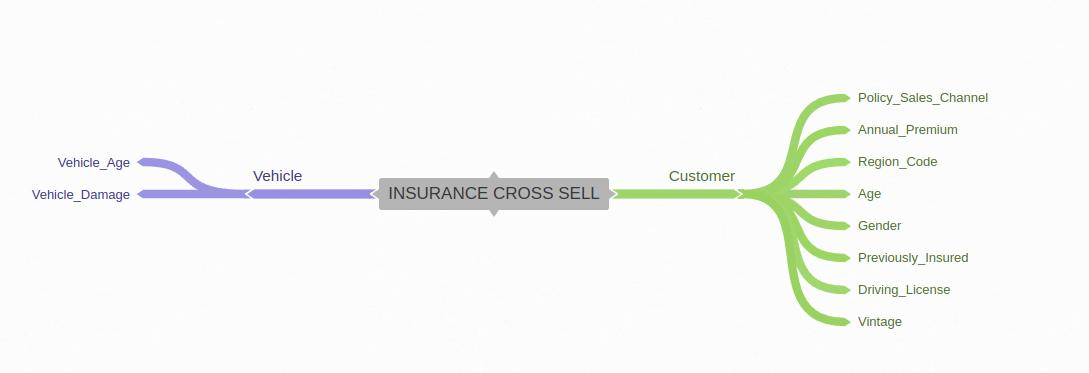

In [27]:
Image( '../img/mind_map.jpg', width=1024, height=620 )

## 2.1. Hypothesis

1. Customers aged >=40 years are more willing to have car insurance.
2. Customers who already have vehicle insurance are not interested in new vehicle insurance.
3. Customers who have had a vehicle for less than 1 year should want vehicle insurance more than customers who have owned a vehicle for longer.
4. Customers who have been associated with the company for a long time may want car insurance.
5. Clients who damaged their cars are more likely to want the insurance.
6. Woman are most likely to want a vehicle insurance.
7. Customers who have region code 28 may want car insurance more than other regions.
8. Customers who have policy_sales_channel = 152 may want car insurance more than other policy_sales_channel
9. People with +40k annual premium should want the insurance

## 2.2. Feature Engineering

In [28]:
df2 = df1.copy()

In [29]:
df2.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [30]:
#vehicle_age
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'over_2_years'  if x == '> 2 Years' else 'between_1_2_years' if x == '1-2 Year' else 'below_1_year')

In [31]:
#vehicle_damage
df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 1  if x == 'Yes' else 0)

In [32]:
df2.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,over_2_years,1,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,between_1_2_years,0,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,over_2_years,1,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,below_1_year,0,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,below_1_year,0,27496.0,152.0,39,0


# 3.0. DATA FILTERING

In [33]:
# Since we don't see any issues or discrepancies in data we will skip this step
df3 = df2.copy()

# 4.0. EDA(Exploratory Data Analysis )

In [34]:
df4 = df3.copy()

## 4.1. Univariate Analysis

In [35]:
df4.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

### gender

### age


<Axes: xlabel='response', ylabel='age'>

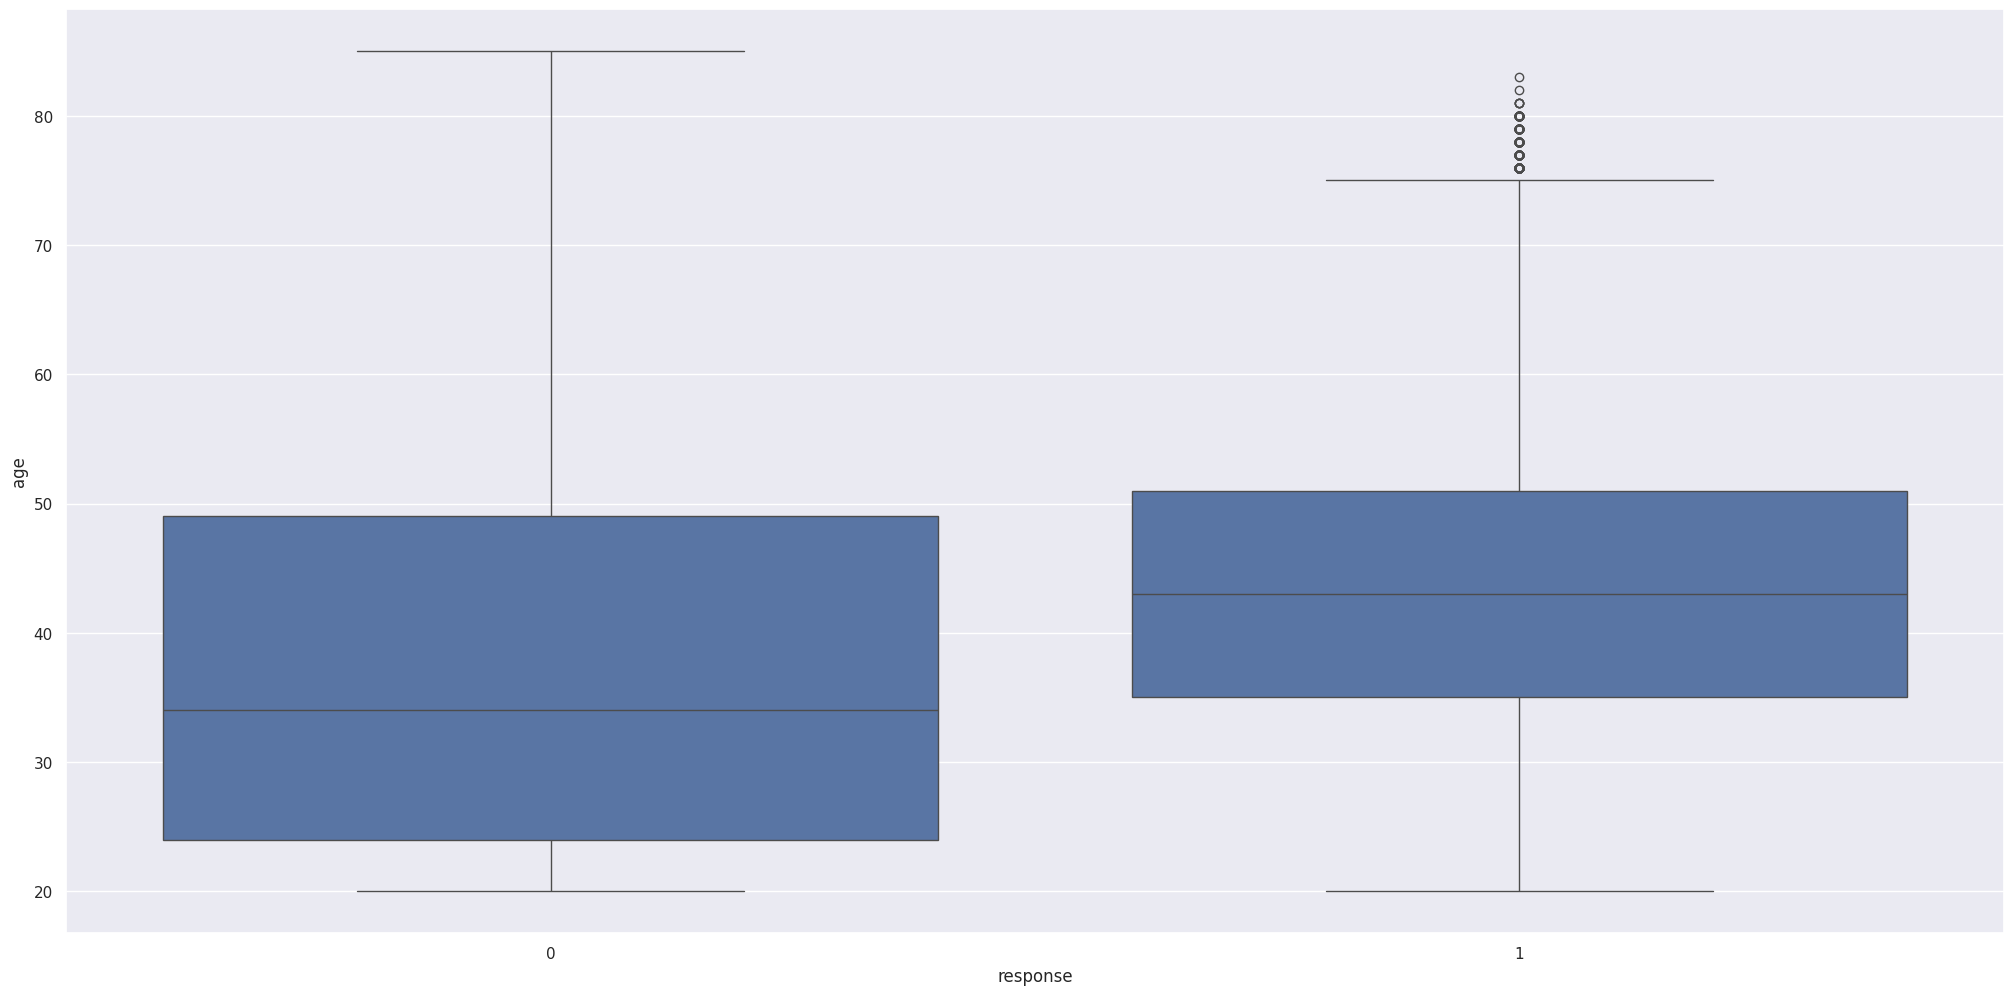

In [36]:
sns.boxplot(x='response', y ='age', data=df4)

<Axes: xlabel='age', ylabel='Count'>

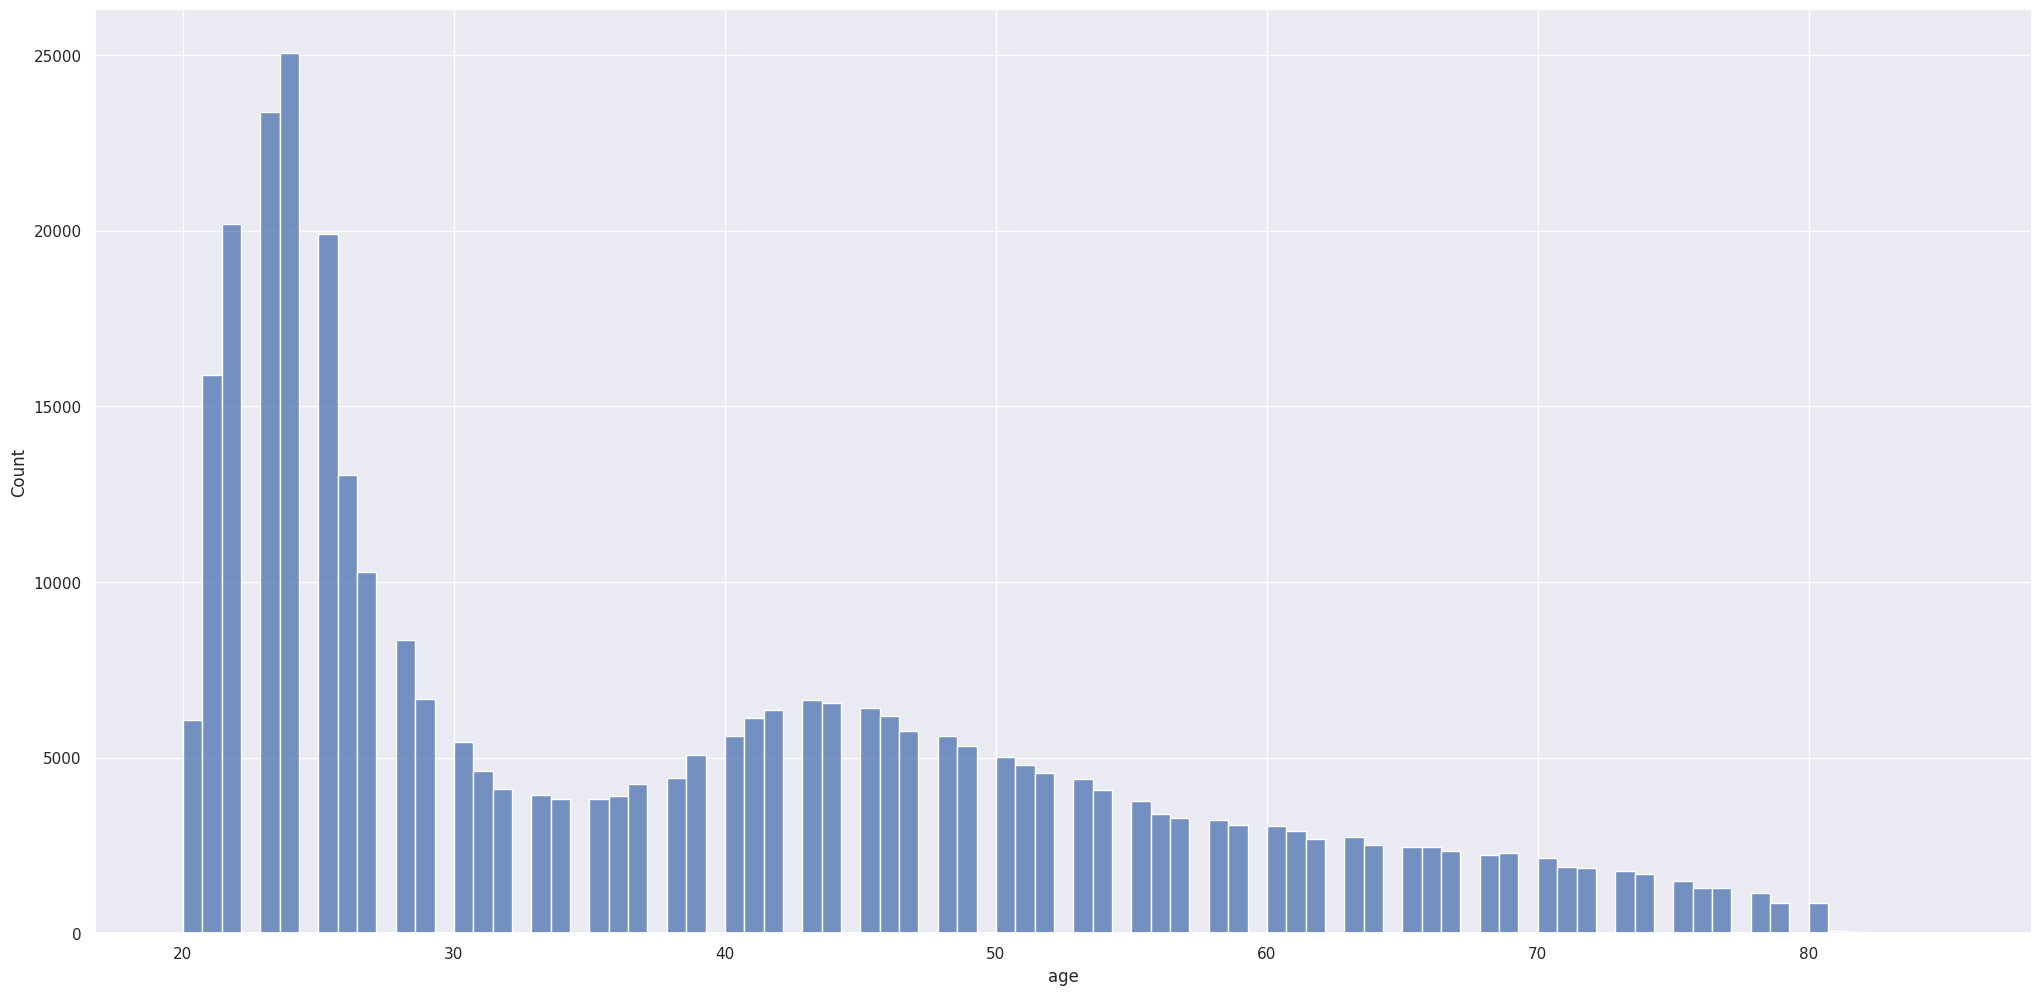

In [37]:
aux00 = df4.loc[df4['response'] == 0, 'age']
sns.histplot(data = aux00)

In [38]:
#Interpretacao do histplot
# Olhar shape e amplitude. A amplitude  das pessoas que nao tem interesse tem uma concentracao grande no inicio ( comportamento semelhante a poisson).
#O boxplot tem o primeiro quartil (25%) na casa dos 25 anos, mediana em torno de 33.

<Axes: xlabel='age', ylabel='Count'>

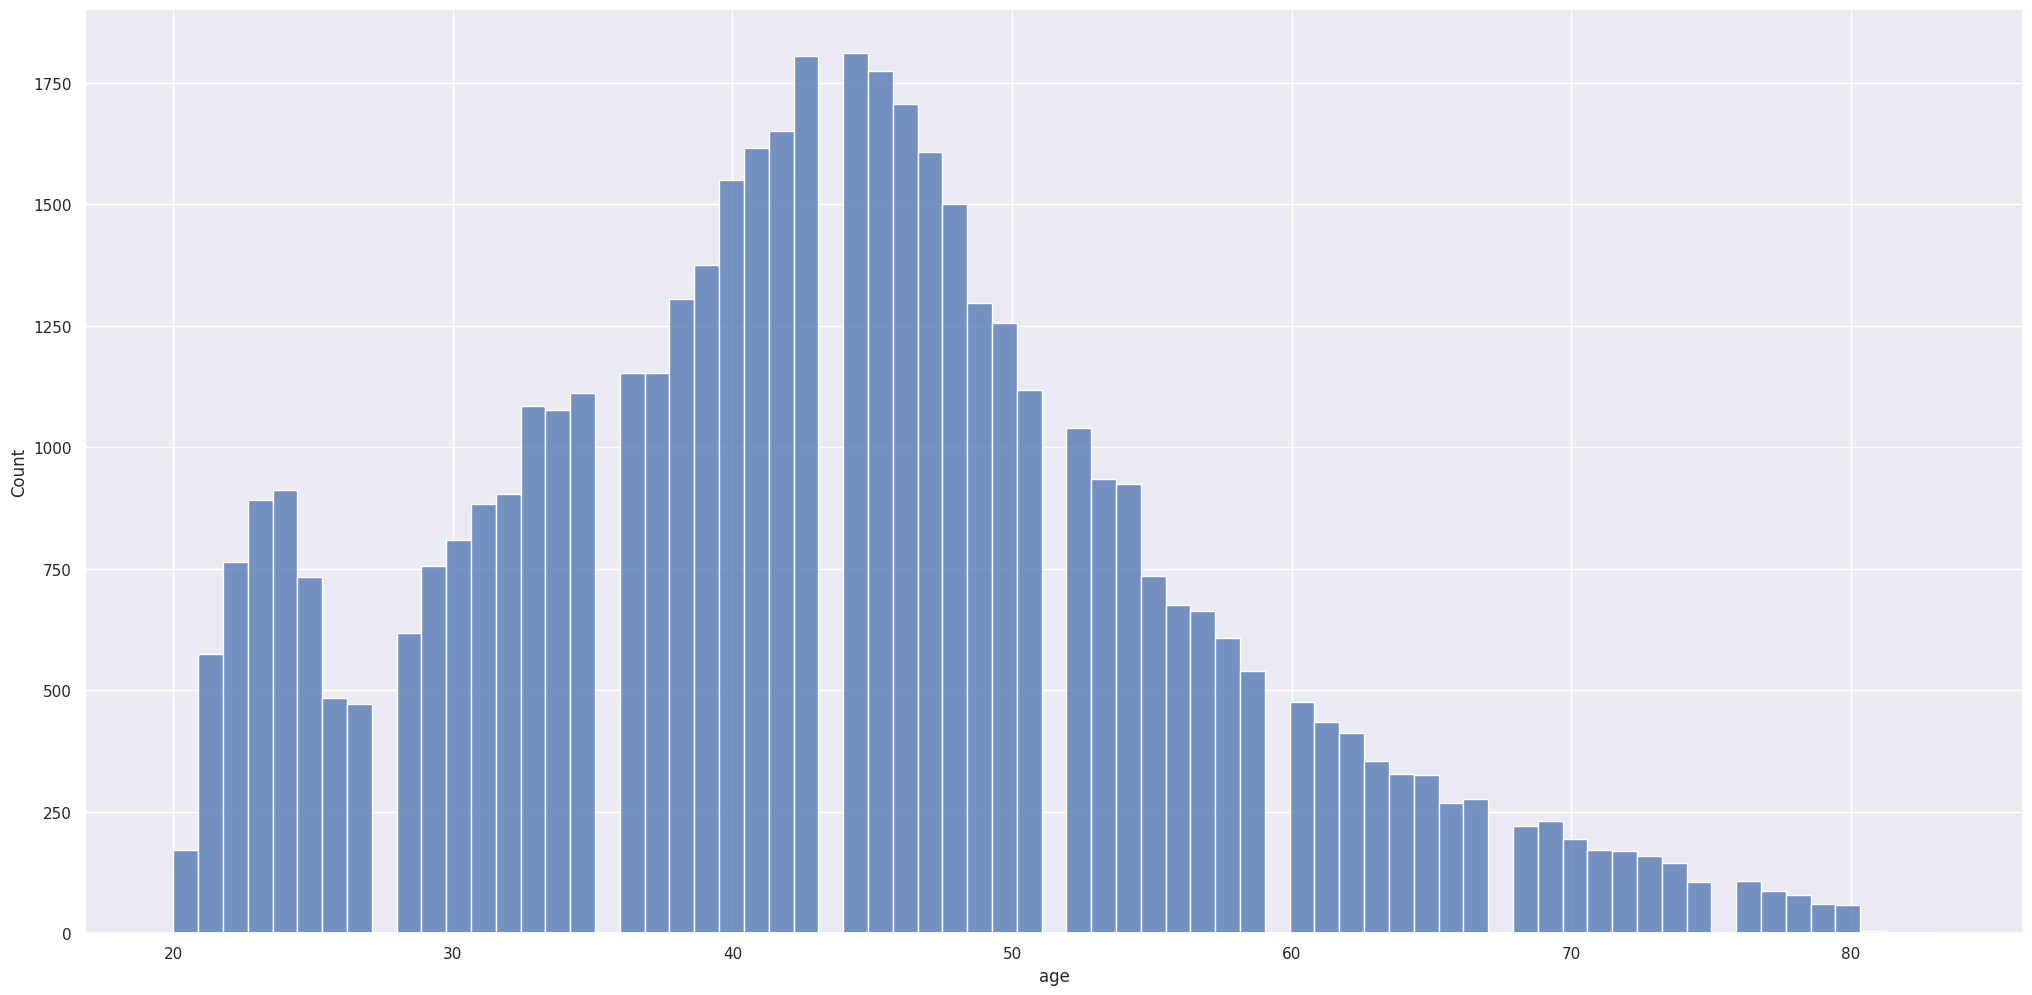

In [39]:
aux00 = df4.loc[df4['response'] == 1, 'age']
sns.histplot(data = aux00)

In [40]:
#Interpretacao do histplot
# Olhar shape e amplitude. A amplitude  das pessoas que  tem interesse segue uma normal e se concentra entre 40-50 anos, 
# mas a dimensao e diferente das pessoas que nao tem interesse, quase 14 vezes menos o valor das pessoas nao interessadas (pode ser problema)
# O fenomeno esta mais represetnado com pessoas que nao tem interesse dos que as que tem interesse.

### driving_license

In [41]:
aux = df4[['driving_license','response']].groupby('response').sum().reset_index()
aux.head()
aux['driving_license_perc'] = aux['driving_license']/ aux['driving_license'].sum()
aux

,response,driving_license,driving_license_perc
0,0,333628,0.877283
1,1,46669,0.122717


In [42]:
#nao da pra ter muita informacao se a variavel e discriminativa ou nao. EMbora 87% nao tem intencao 
#de ter seguro de carro precisamos szaber quem sao essas pessoas, anual premium menor? menores de idade?


### region_code

<Axes: xlabel='region_code', ylabel='id'>

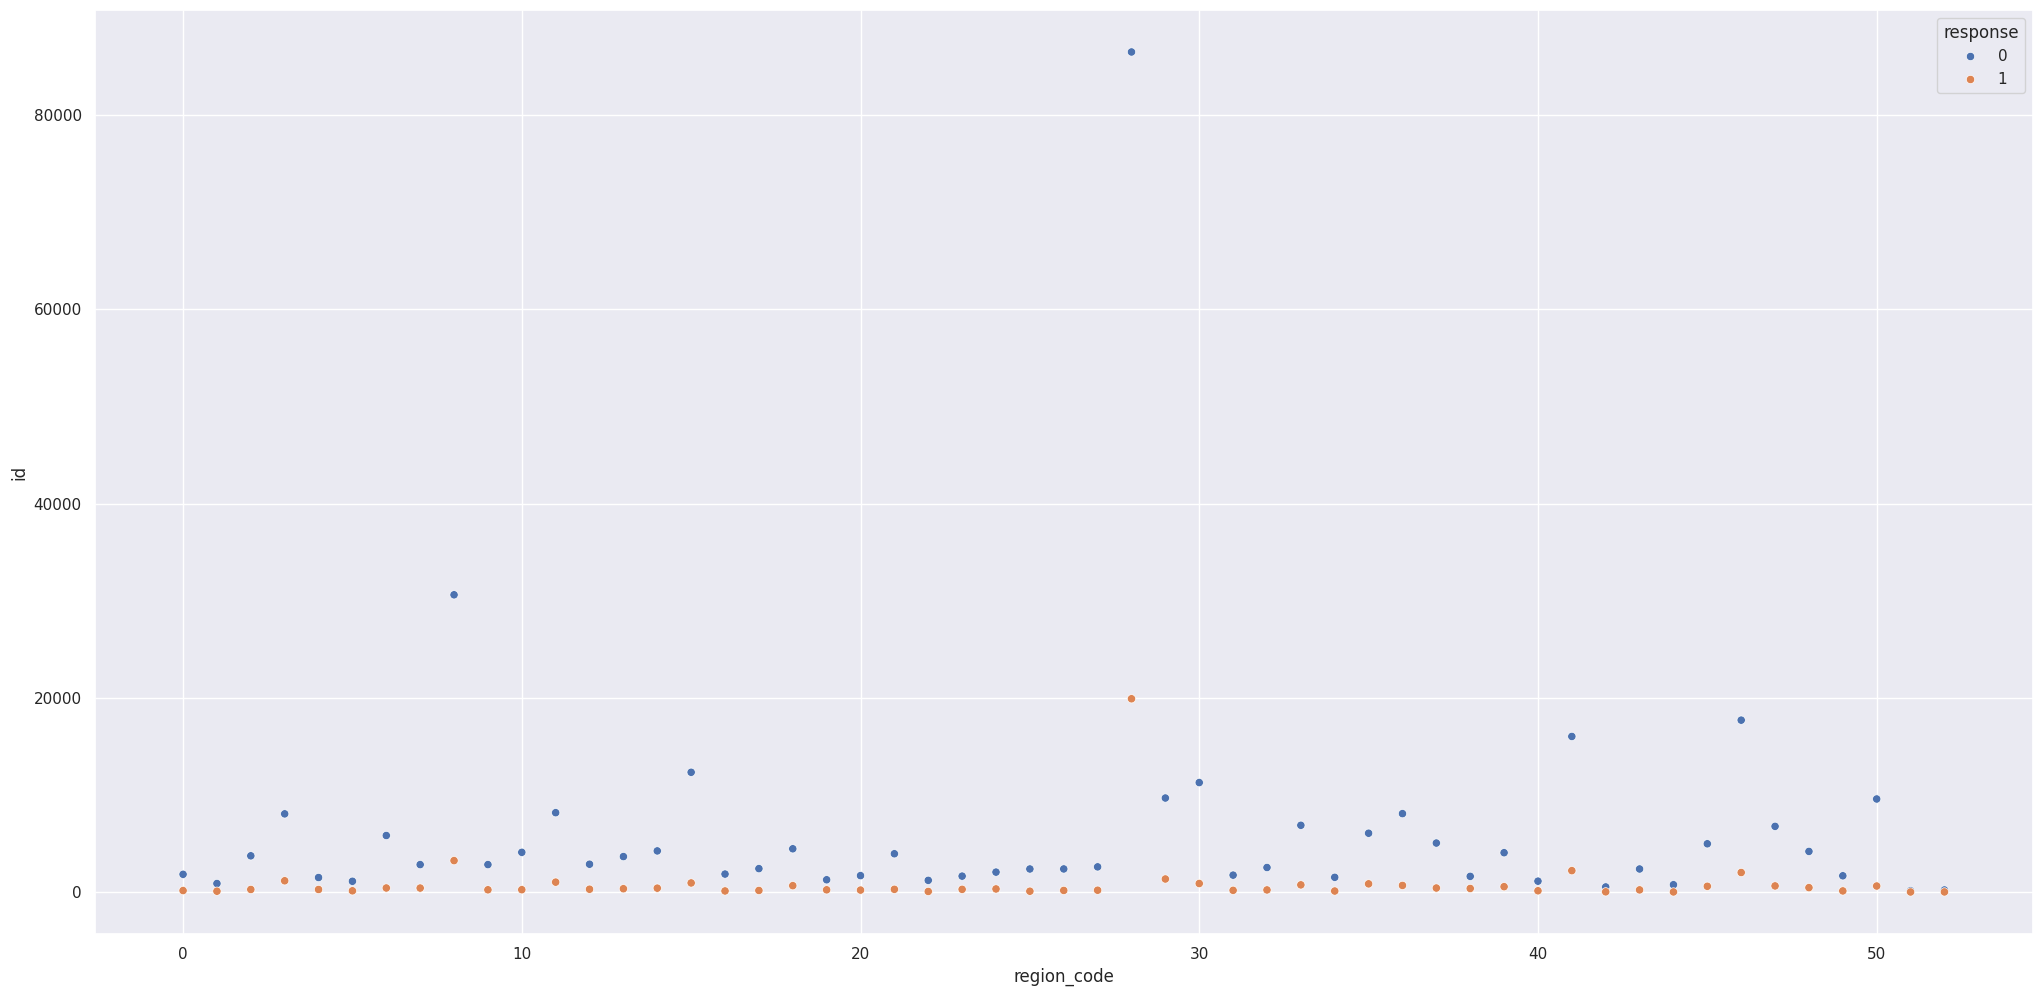

In [43]:
aux0 = df4[['id','region_code','response']].groupby(['region_code','response']).count().reset_index()
sns.scatterplot(x='region_code', y='id', hue ='response',data=aux0)

In [44]:
#a variavel sozinha parece nao ajudar muito, os dados estao muito embolados.

### previously_insured

In [45]:
#tabela de contingencia( temos dados apenas sim ou nao)
pd.crosstab(df4['previously_insured'],df4['response']).apply(lambda x: x/x.sum(), axis =1)

response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


In [46]:
# quase todo mundo que ja tem seguro de carro (99%) nao querem outro.

### vehicle_age

In [47]:
df4[['vehicle_age','response']].value_counts(normalize=True).reset_index()

,vehicle_age,response,proportion
0,between_1_2_years,0,0.434285
1,below_1_year,0,0.413488
2,between_1_2_years,1,0.091328
3,over_2_years,0,0.029663
4,below_1_year,1,0.018897
5,over_2_years,1,0.012338


In [48]:
#temos uma discrepancia grande para veiculos >1 ano, entre 1 e 2 anos, 
#porem para veiculos acima de 2 anos nao temos uma discrepancia grande entre pessoas que querem e pessoas que nao querem o seguro

### vehicle_damage

### annual_premium

<Axes: xlabel='response', ylabel='annual_premium'>

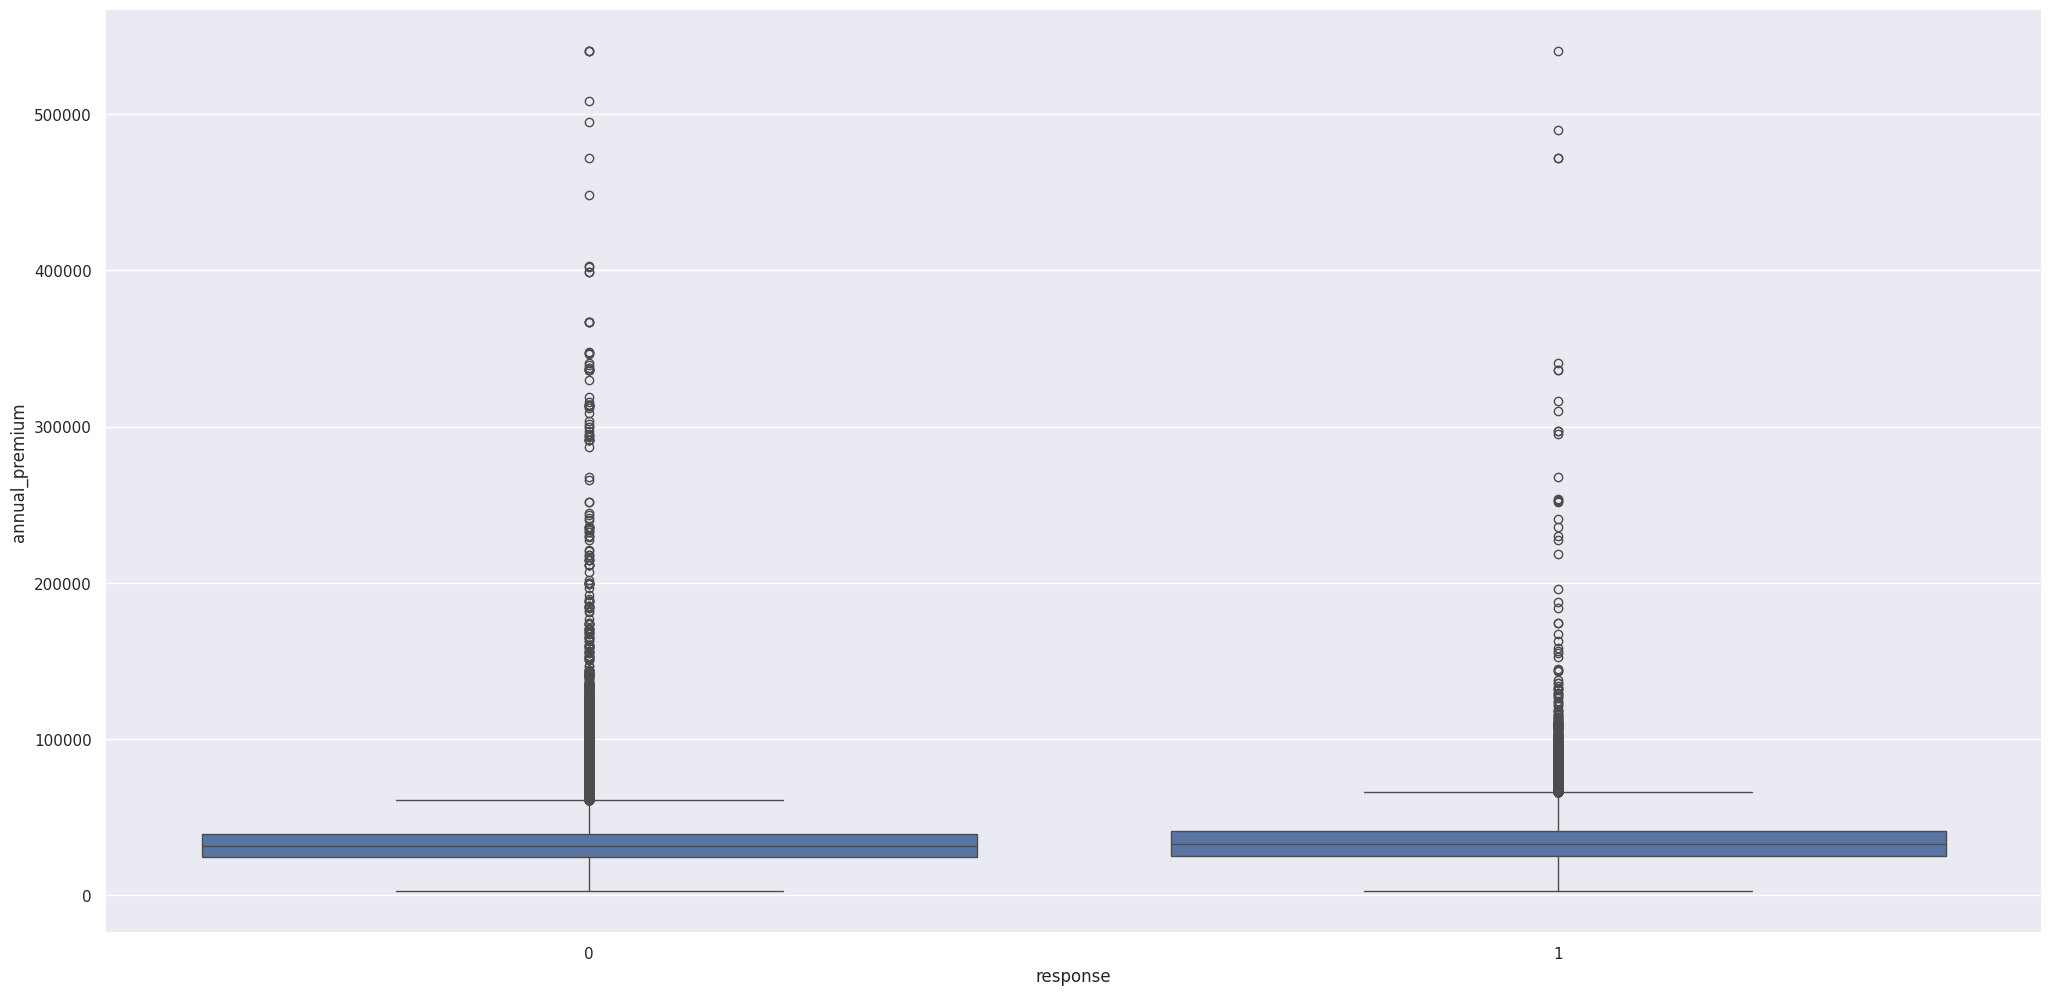

In [49]:
sns.boxplot(x='response', y ='annual_premium', data=df4)

<Axes: xlabel='response', ylabel='annual_premium'>

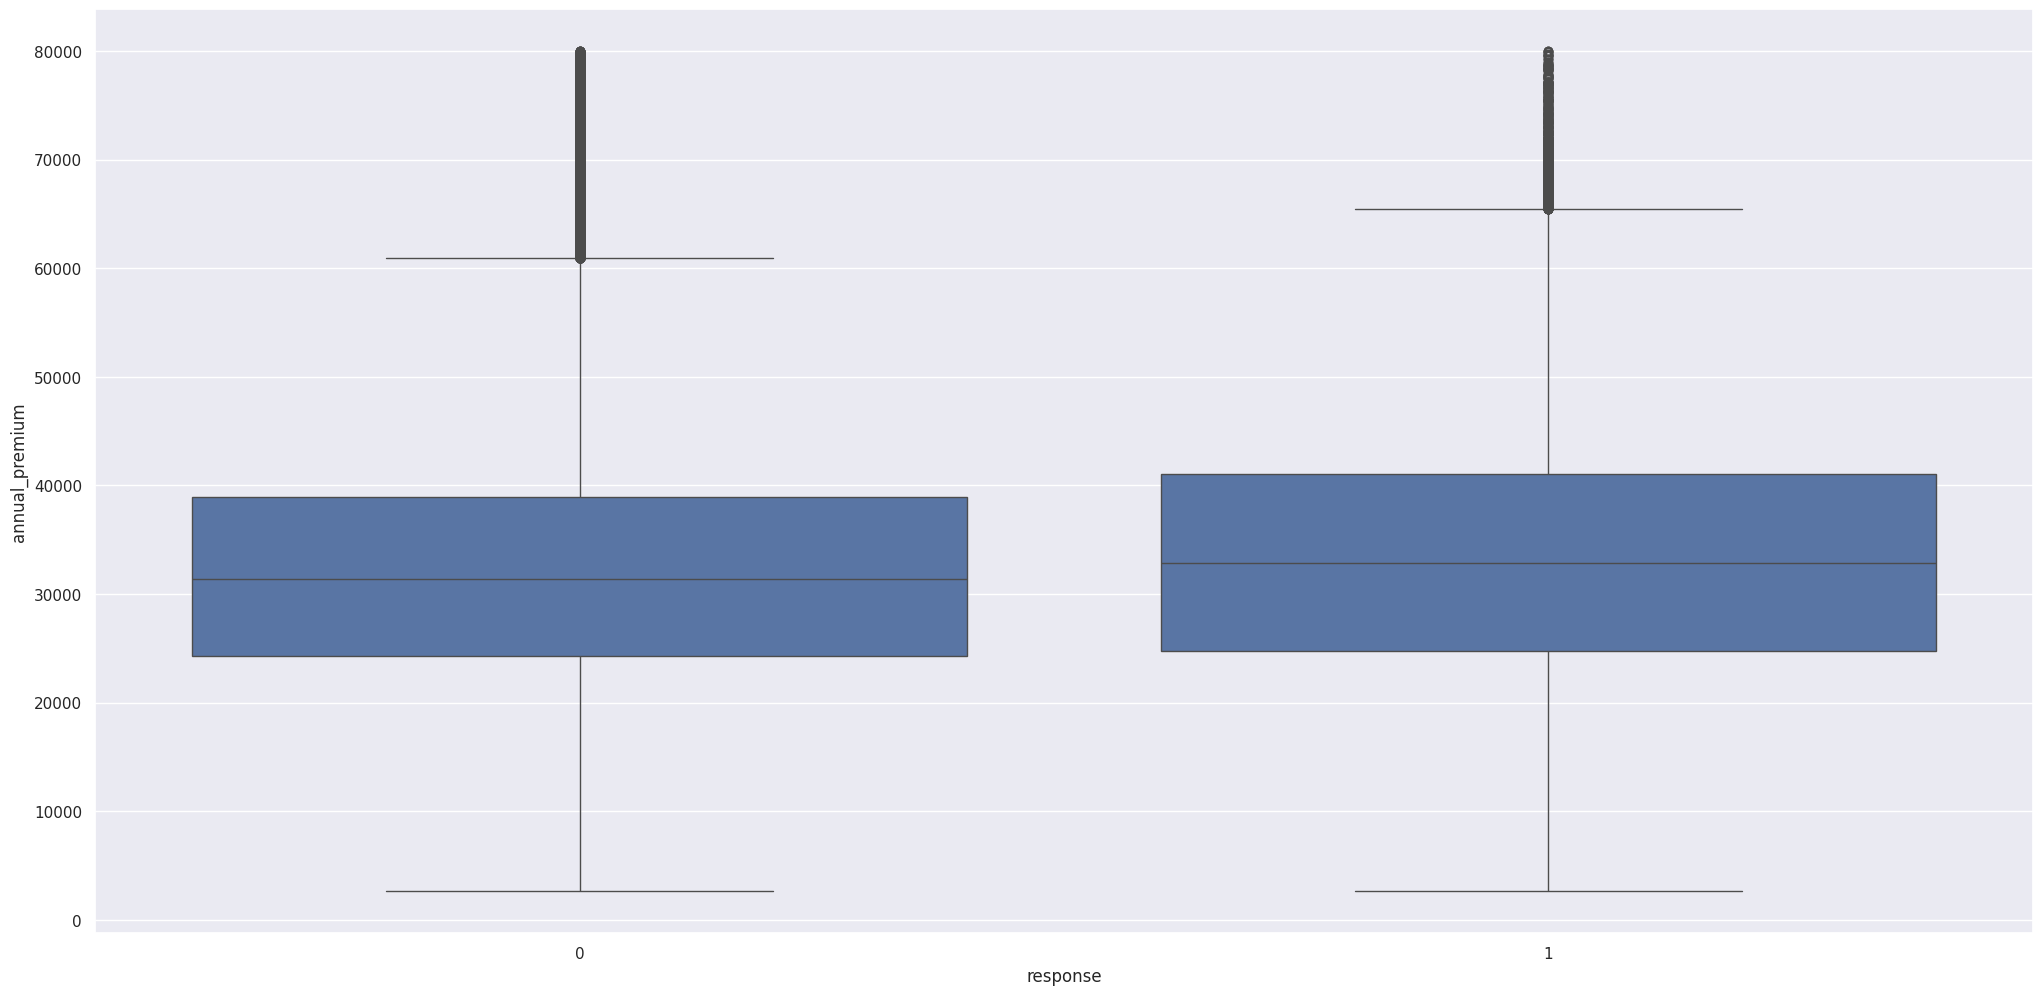

In [50]:
# como os dados acima estao muito desproporcionais (muito outlier), vou excluir valores acima de 80000
aux=df4[df4['annual_premium'] < 80000]
sns.boxplot(x='response', y ='annual_premium', data=aux)

In [51]:
#medianas proximas para valores 1 e 0. SOzinha nao tem muito informacao, 
#tlvz se combinada com outras variaveis pode ser util

<Axes: >

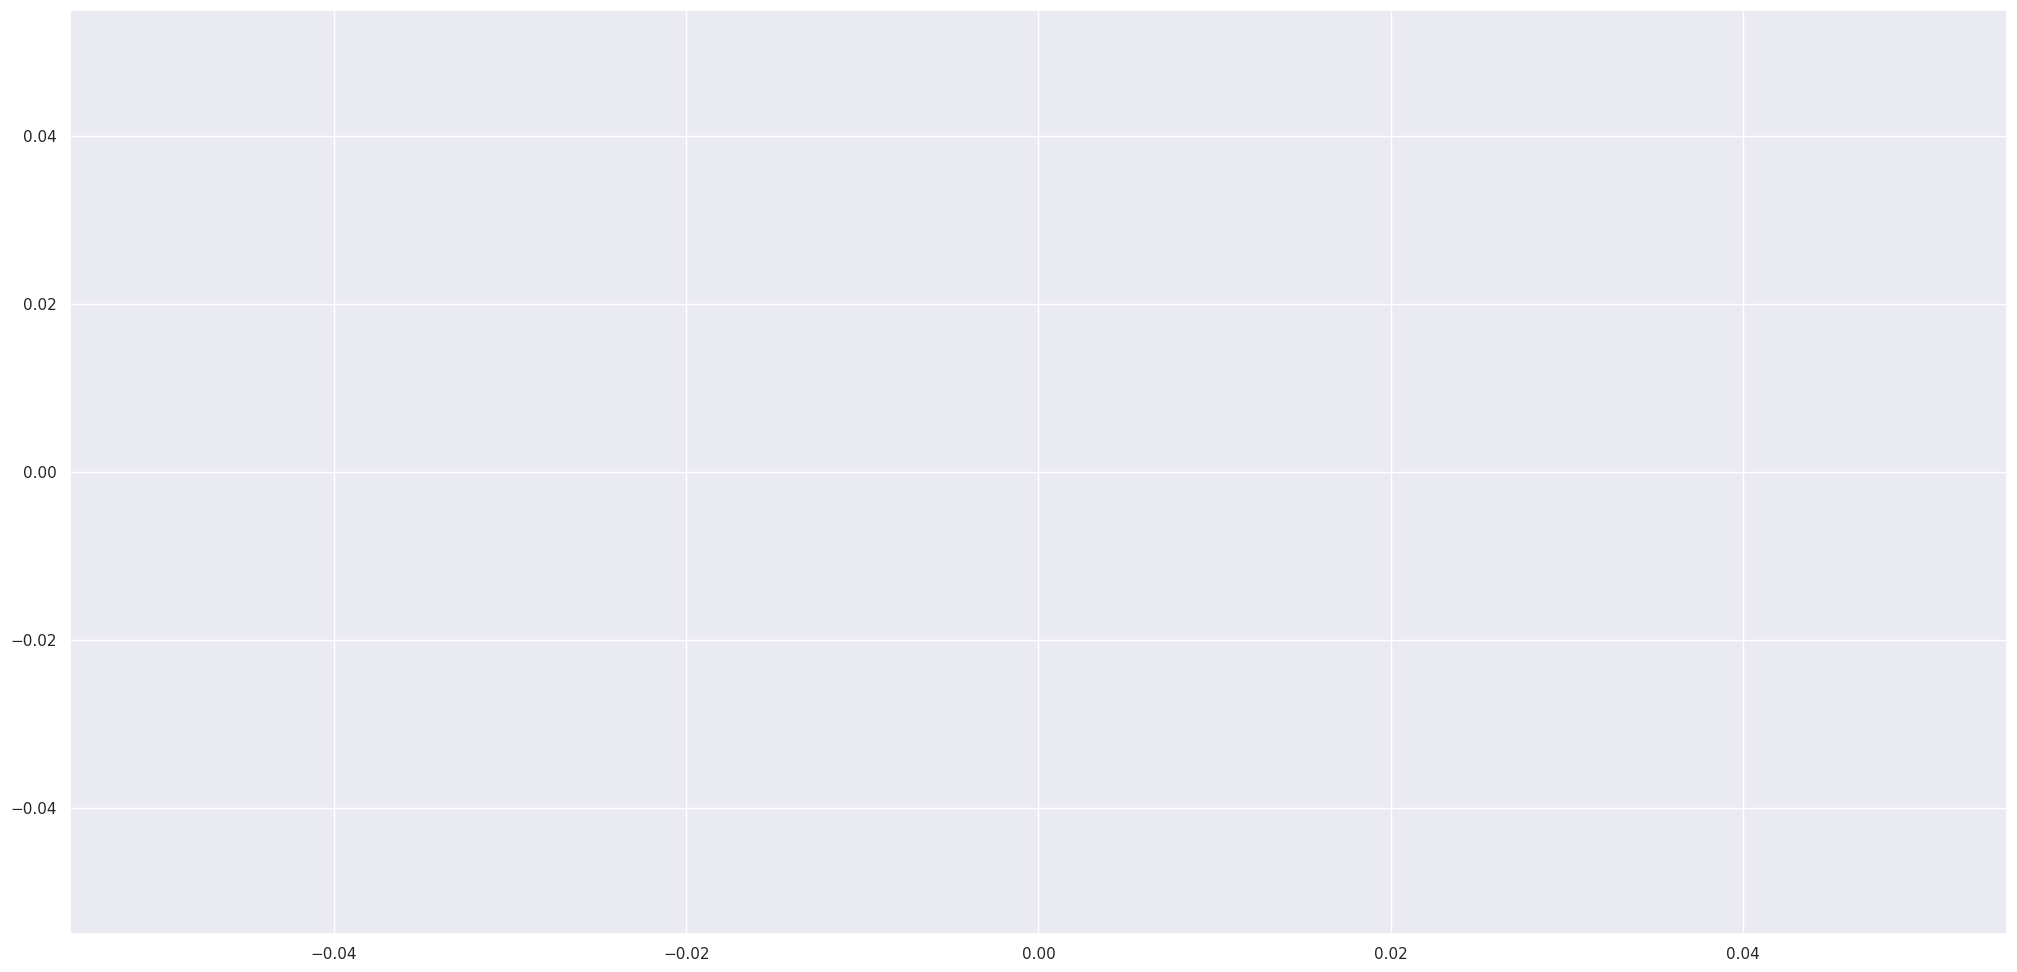

In [52]:
aux00 = aux.loc[df4['response'] == '0', 'annual_premium']
sns.histplot(data = aux00)

<Axes: >

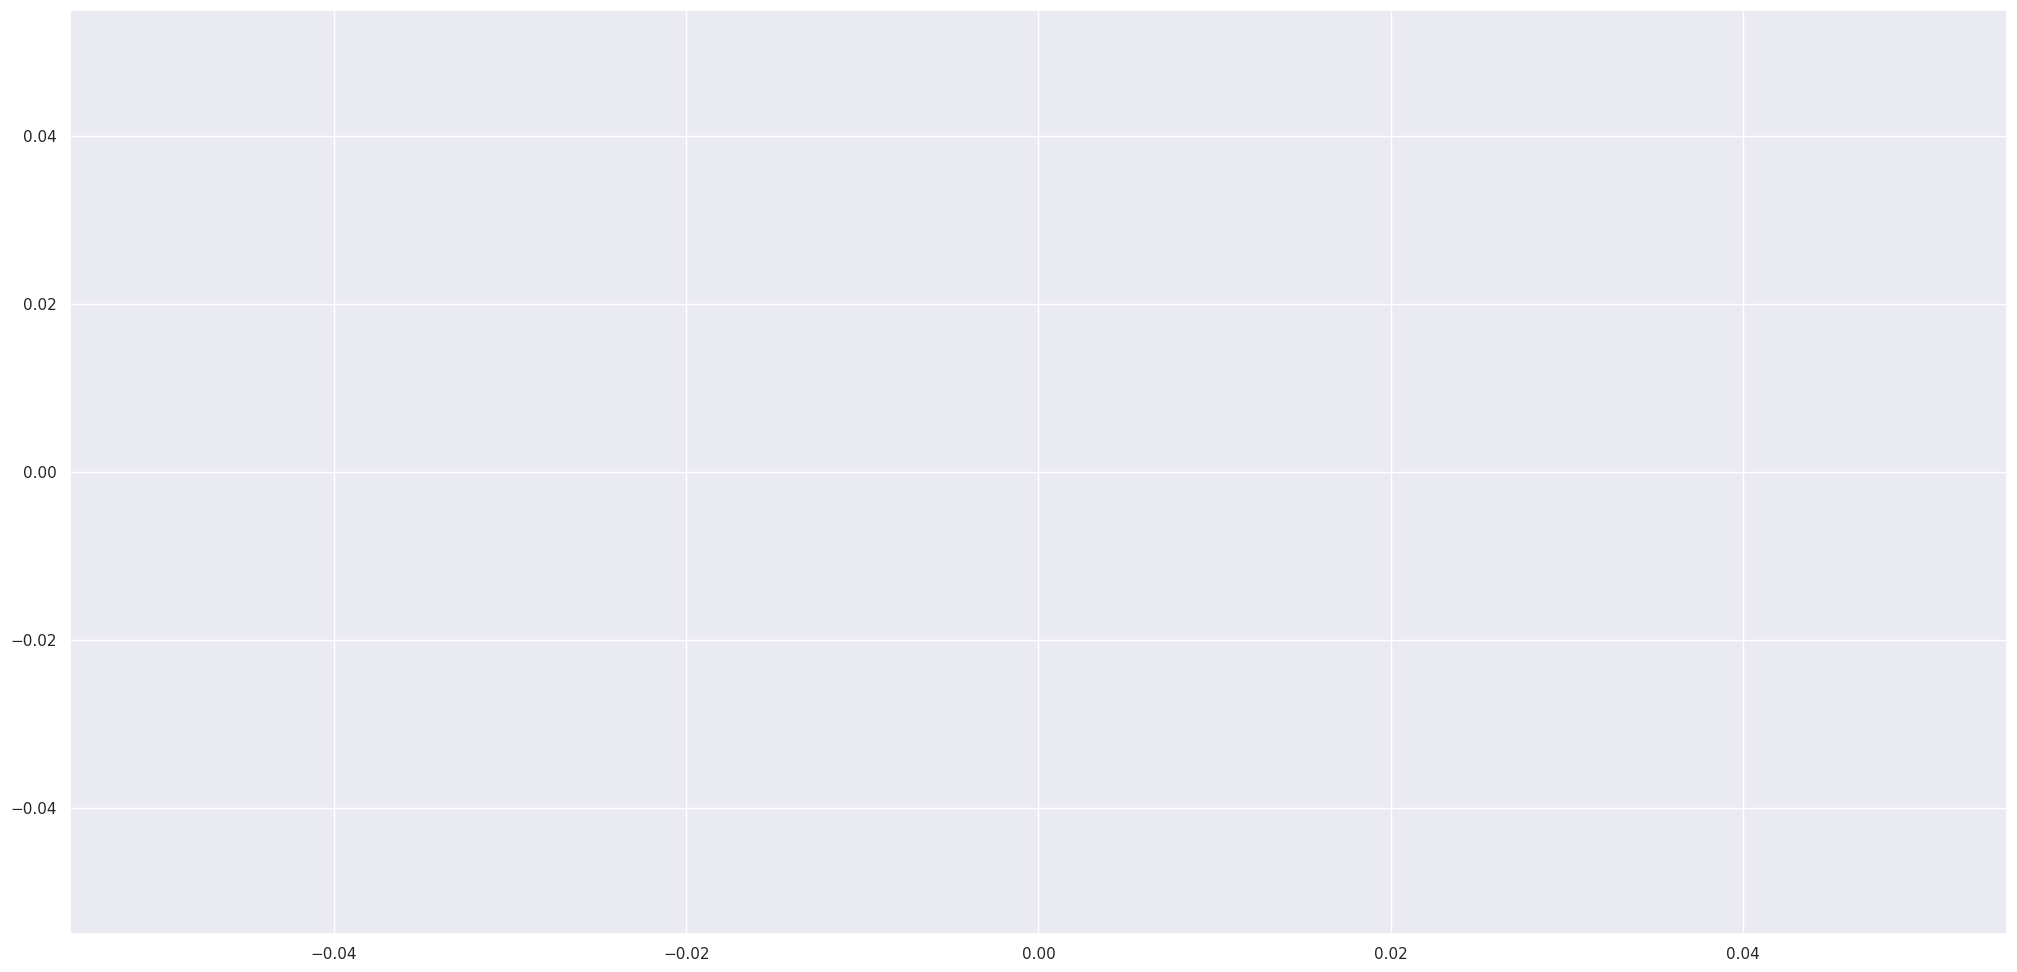

In [53]:
aux00 = aux.loc[df4['response'] == '1', 'annual_premium']
sns.histplot(data = aux00)

In [54]:
#muitas pessoas pagam pouco, tem uma concentracao enorme  de pessoas que pagam menos que 10.000 vou criar um filtro secundario

<Axes: >

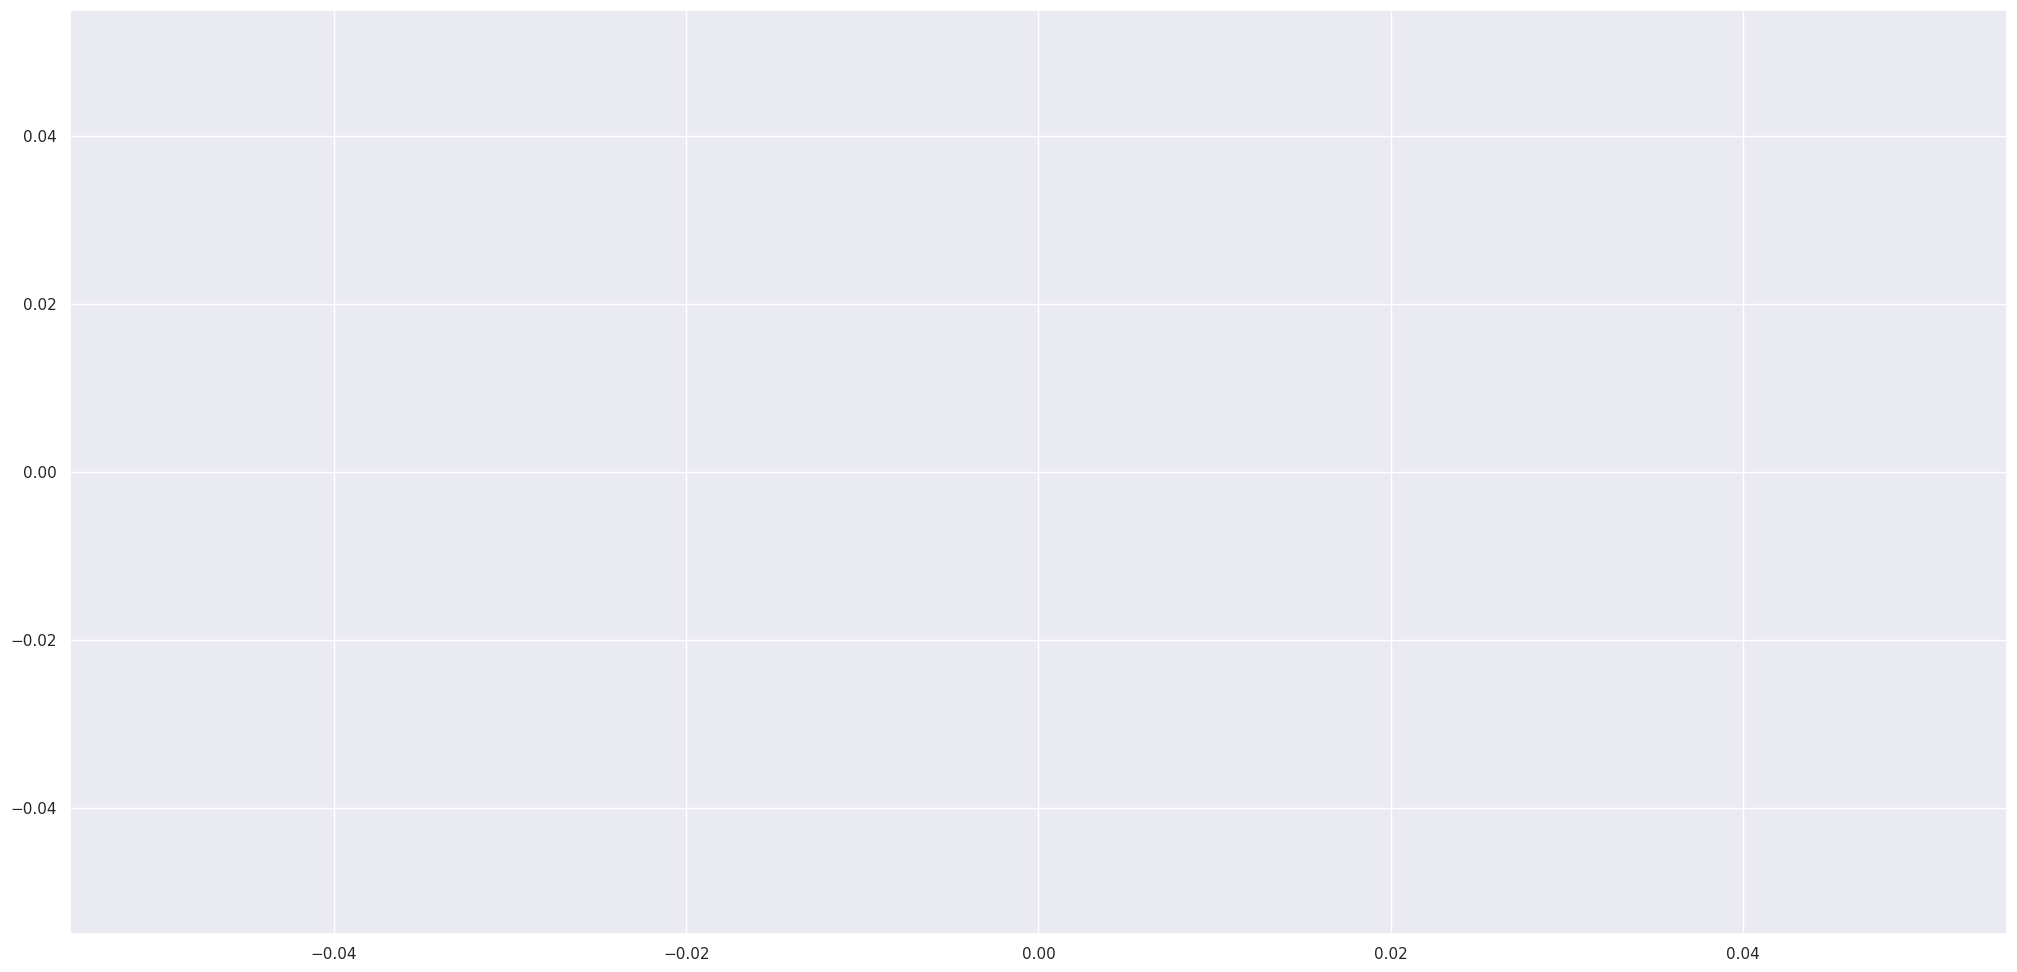

In [55]:
aux =df4[(df4['annual_premium'] > 10000) & (df4['annual_premium'] < 80000)]
aux00 = aux.loc[df4['response'] == '0', 'annual_premium']
sns.histplot(data = aux00)

<Axes: >

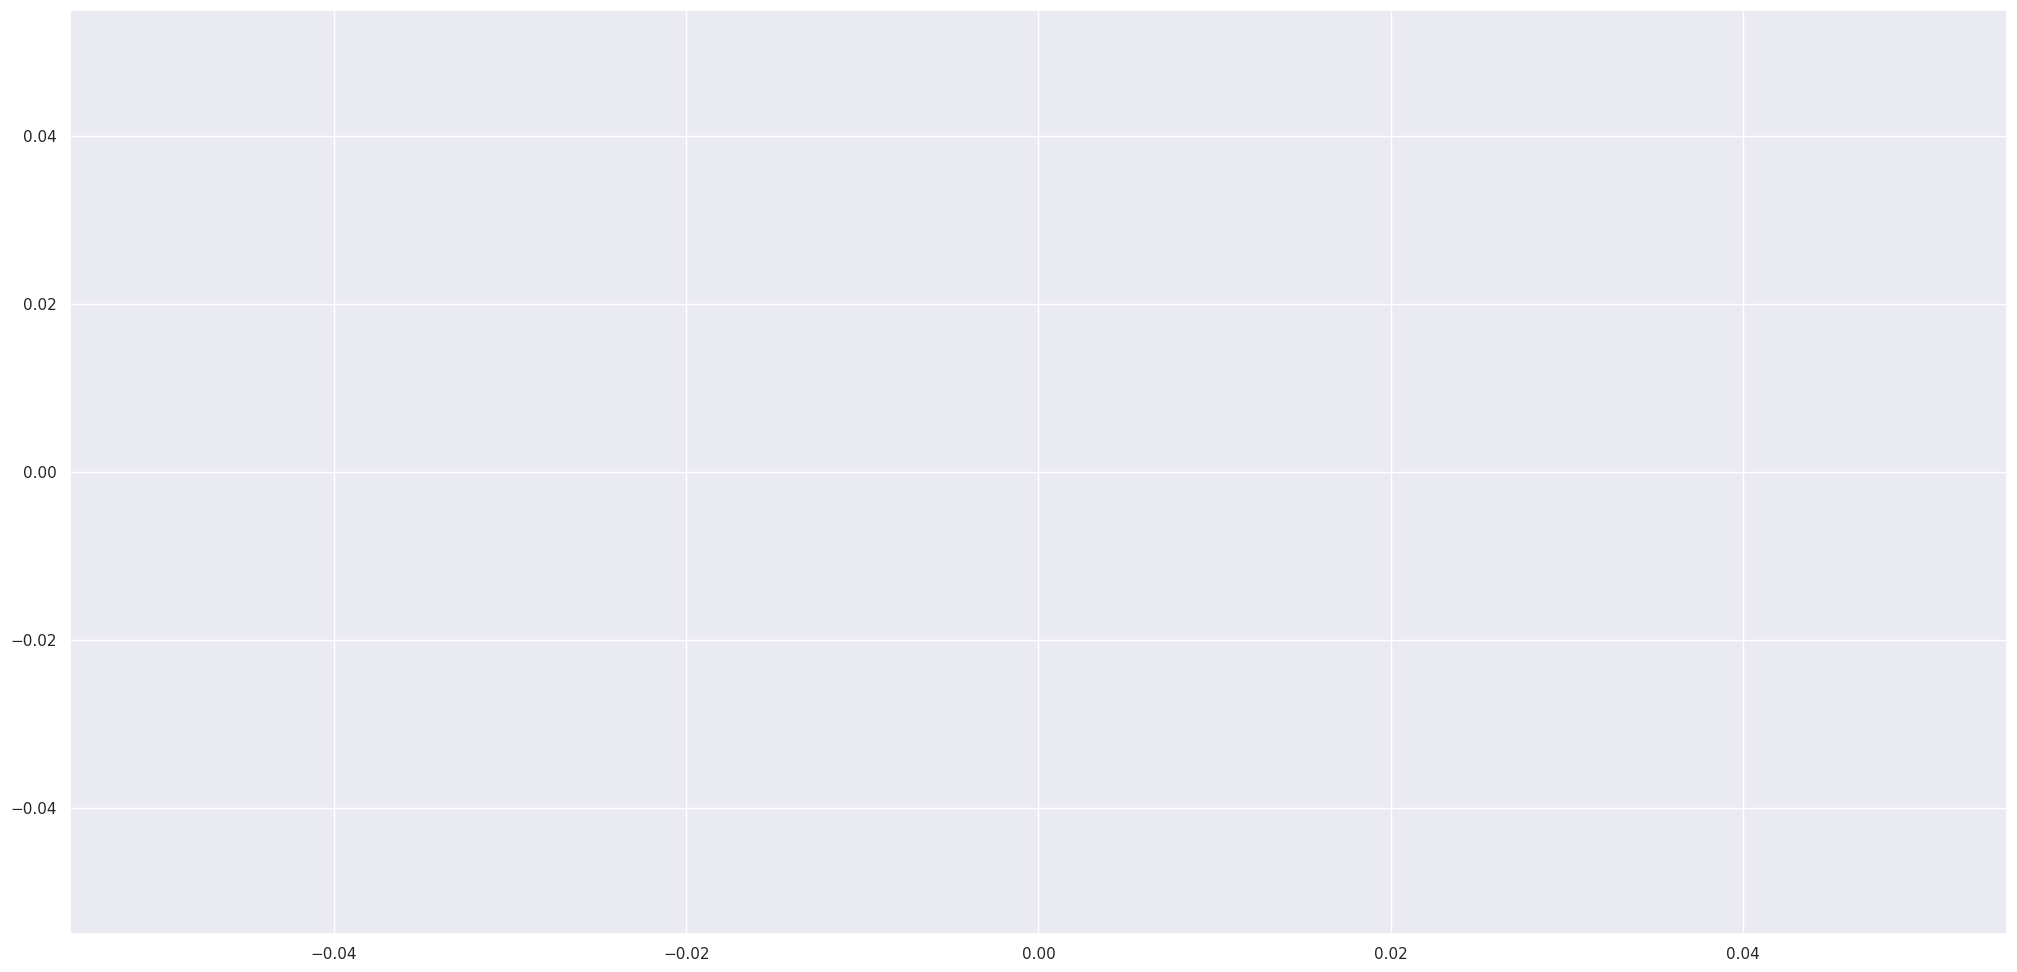

In [56]:
aux =df4[(df4['annual_premium'] > 10000) & (df4['annual_premium'] < 80000)]
aux00 = aux.loc[df4['response'] == '1', 'annual_premium']
sns.histplot(data = aux00)

In [57]:
#Tanto os grupos 0 e 1 tem o boxplot ou histplot muito parecido, nao tem uma discriminacao, entao sozinha  a variavel nao ajuda.

### policy_sales_channel

<Axes: xlabel='response', ylabel='policy_sales_channel'>

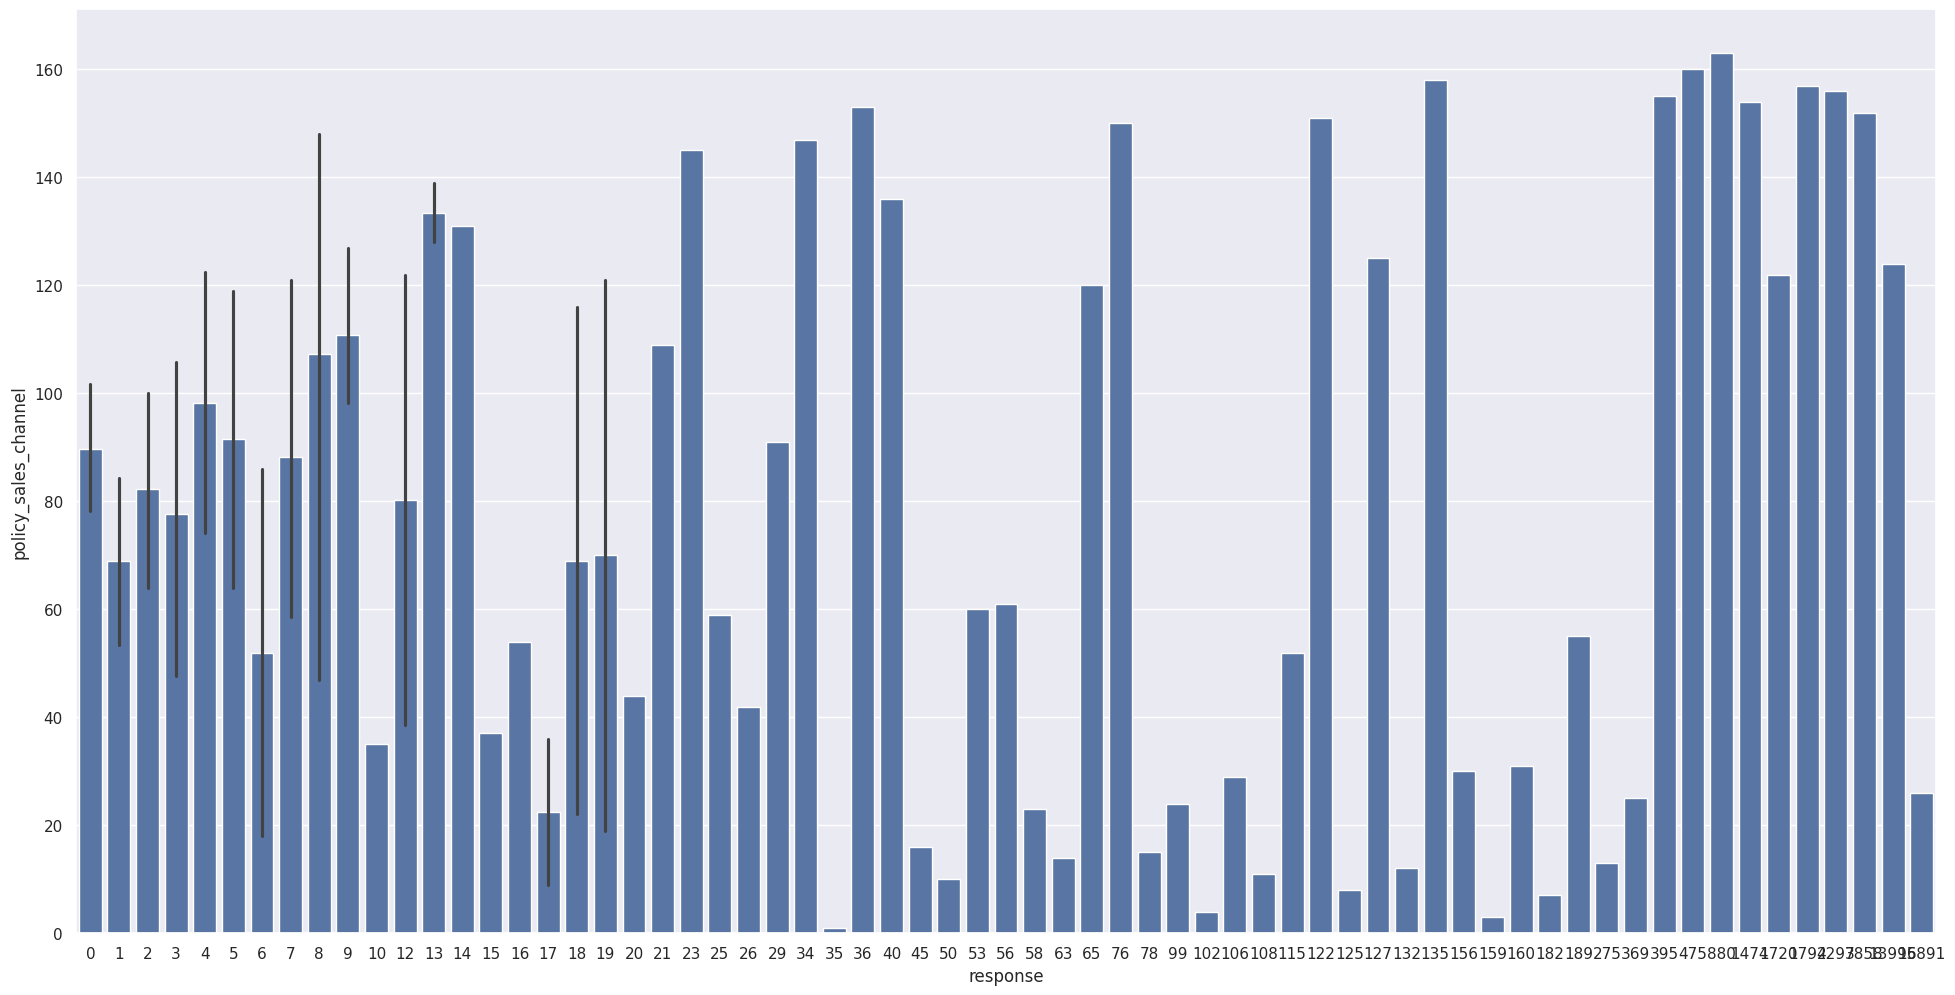

In [58]:
plt.figure(figsize=(24,12))
aux=df4[['policy_sales_channel','response']].groupby('policy_sales_channel').sum().reset_index()
sns.barplot(x='response', y='policy_sales_channel', data=aux)

In [59]:
df_aux= df4[['policy_sales_channel','response']]
df_aux['response'] = df_aux['response'].astype('string')

df_aux.dtypes
df_aux.head()

/tmp/ipykernel_61104/1274072686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['response'] = df_aux['response'].astype('string')


,policy_sales_channel,response
0,26.0,1
1,26.0,0
2,26.0,1
3,152.0,0
4,152.0,0


In [60]:
df_aux['response']  = df_aux['response'].map({'1': 'Yes', '0': 'No'})
df_aux.head()

/tmp/ipykernel_61104/3921507790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['response']  = df_aux['response'].map({'1': 'Yes', '0': 'No'})


,policy_sales_channel,response
0,26.0,Yes
1,26.0,No
2,26.0,Yes
3,152.0,No
4,152.0,No


In [61]:

df1_ax = (df_aux
      .groupby("policy_sales_channel")["response"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())
df1_ax.reset_index()

response,policy_sales_channel,No,Yes
0,1.0,96.74,3.26
1,2.0,75.00,25.00
2,3.0,69.60,30.40
3,4.0,79.96,20.04
4,6.0,100.00,NaN
5,7.0,88.61,11.39
6,8.0,91.75,8.25
7,9.0,89.94,10.06
8,10.0,81.06,18.94
9,11.0,91.02,8.98


### vintage

<Axes: xlabel='response', ylabel='vintage'>

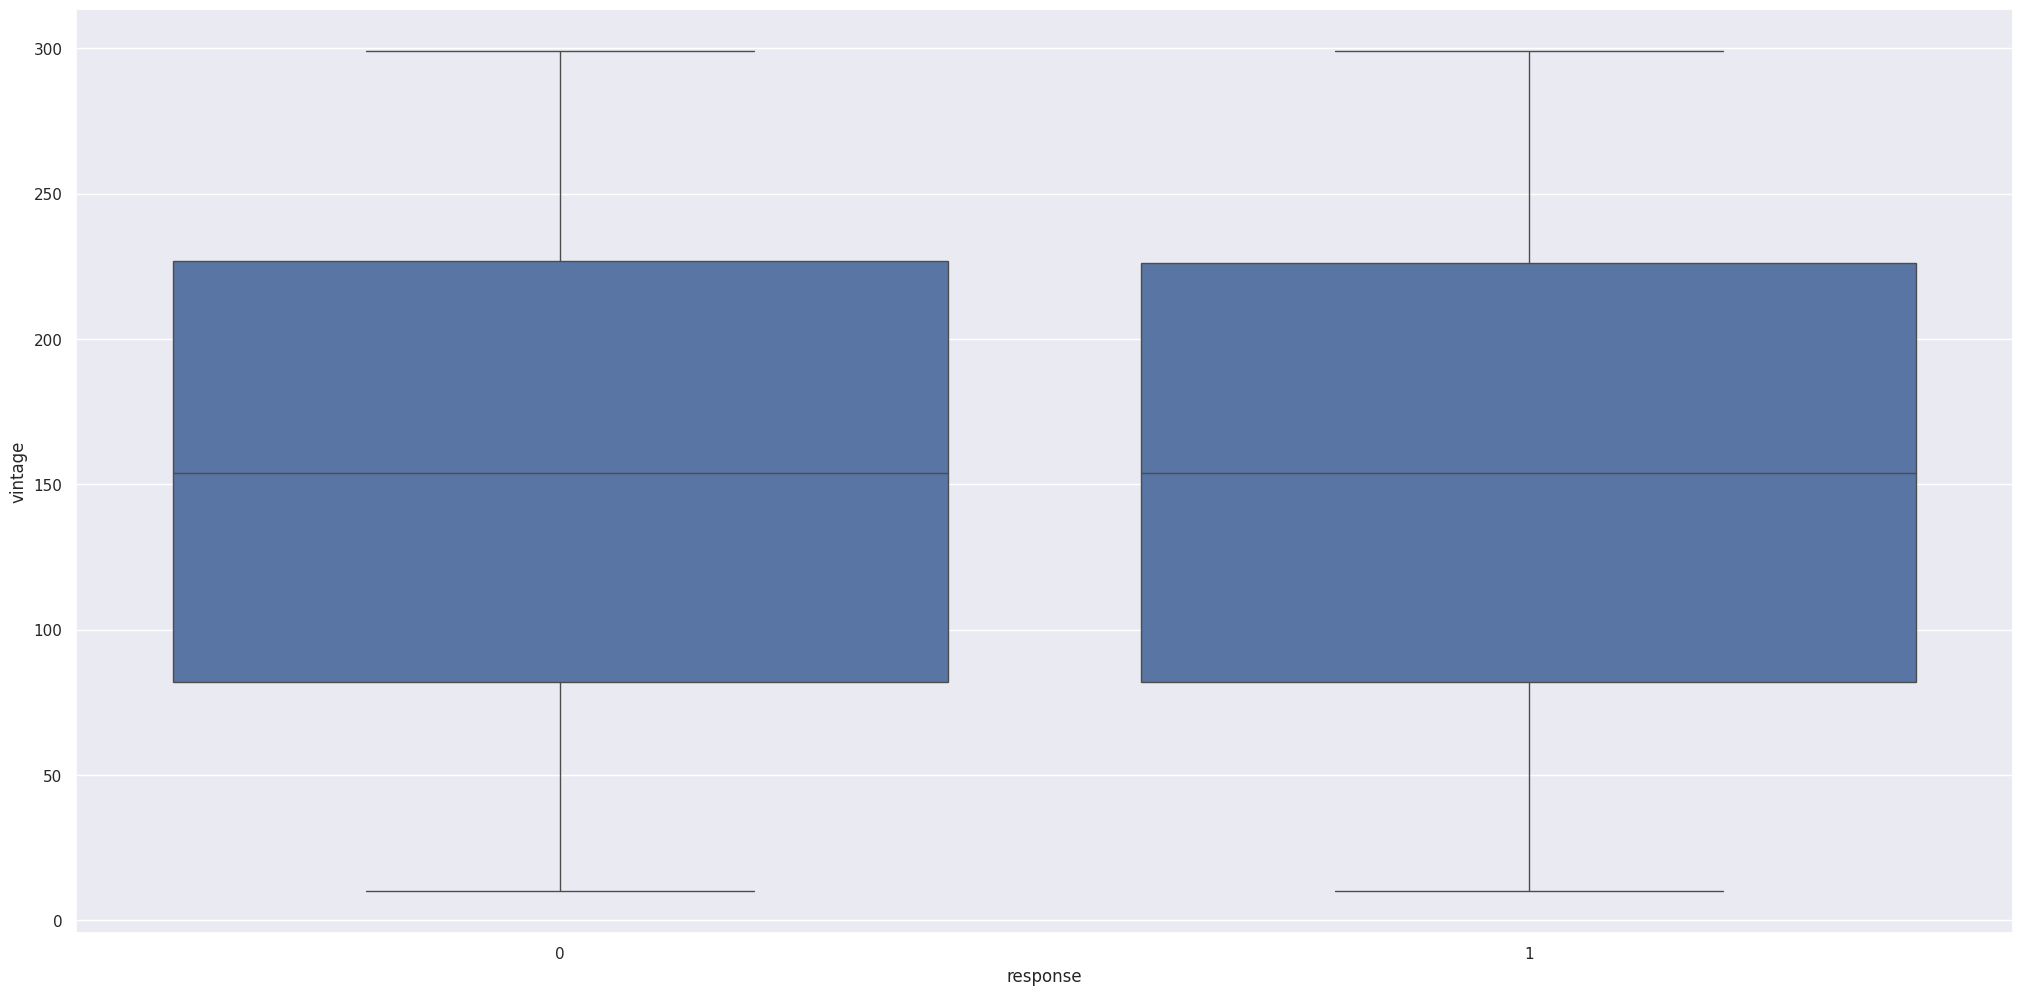

In [62]:
sns.boxplot(x='response', y='vintage',data=df4)

<Axes: xlabel='vintage', ylabel='Count'>

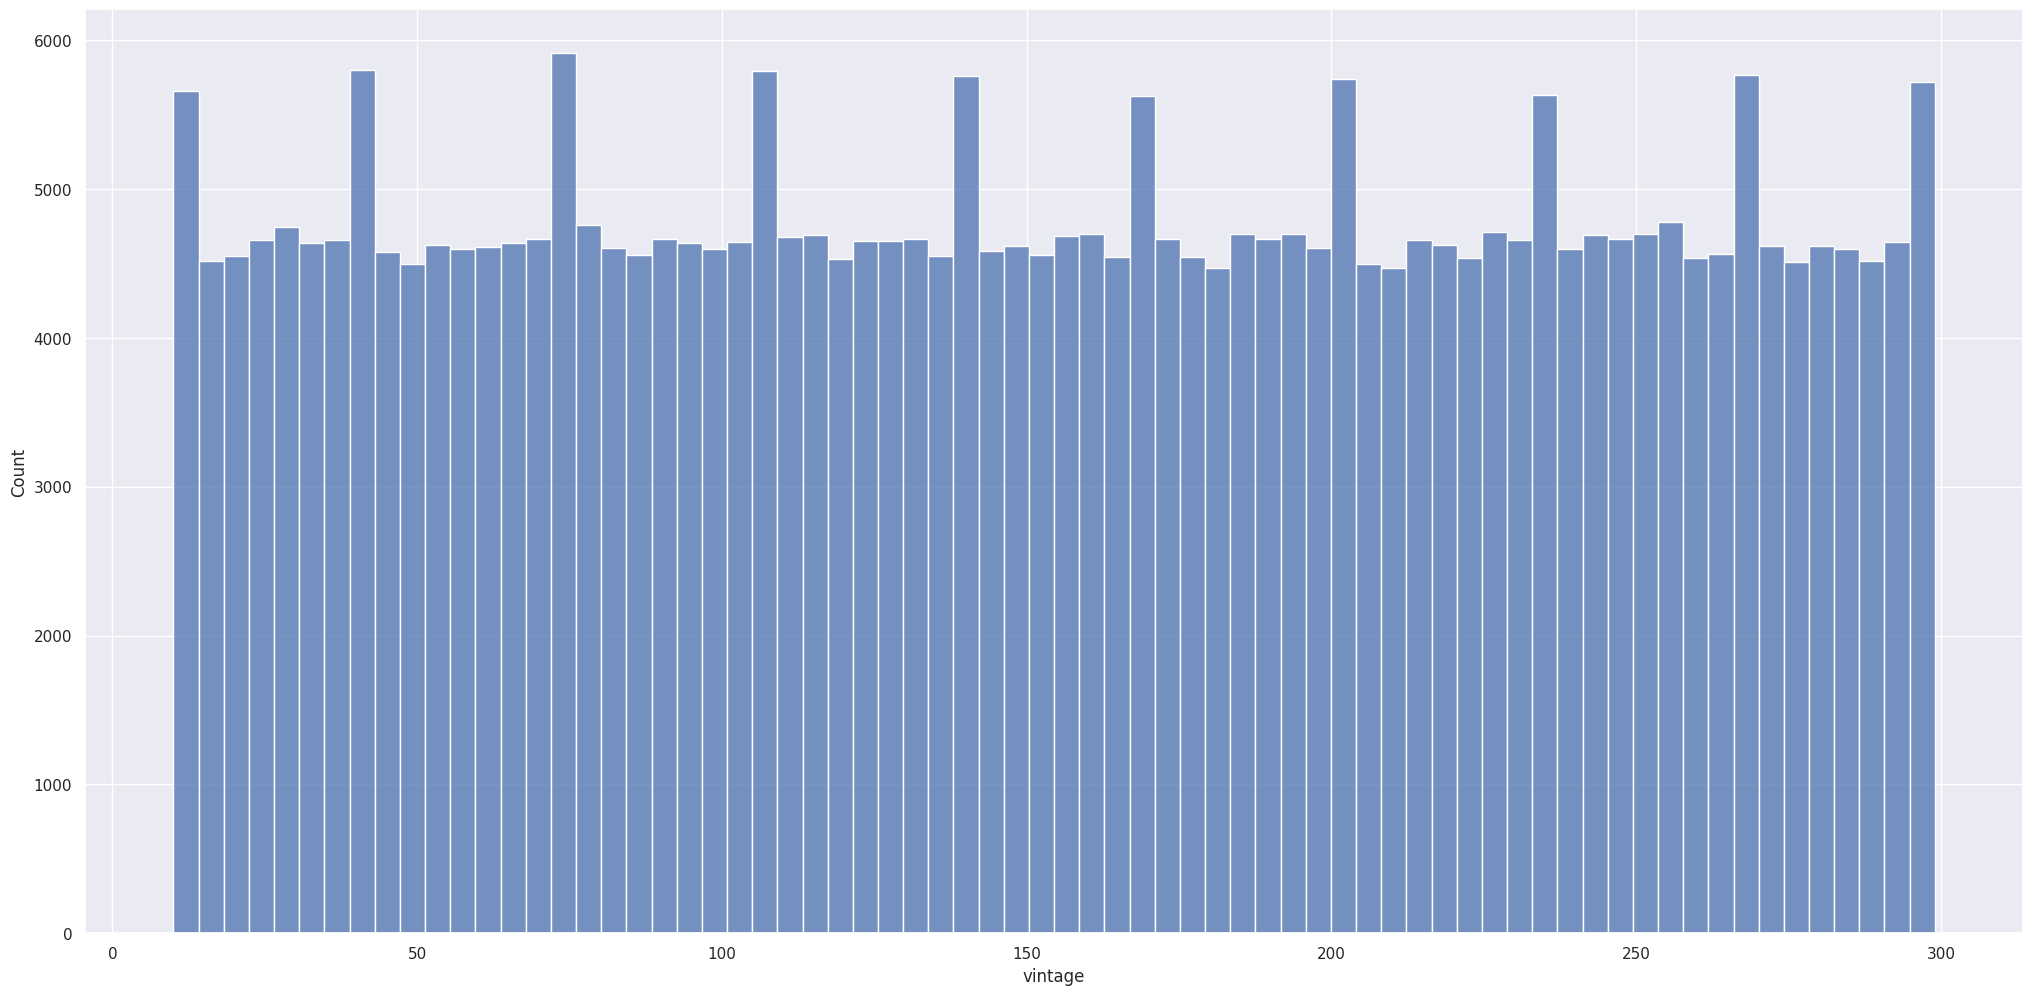

In [63]:
aux00= df4.loc[df4['response']==0,'vintage']
sns.histplot(aux00)

<Axes: xlabel='vintage', ylabel='Count'>

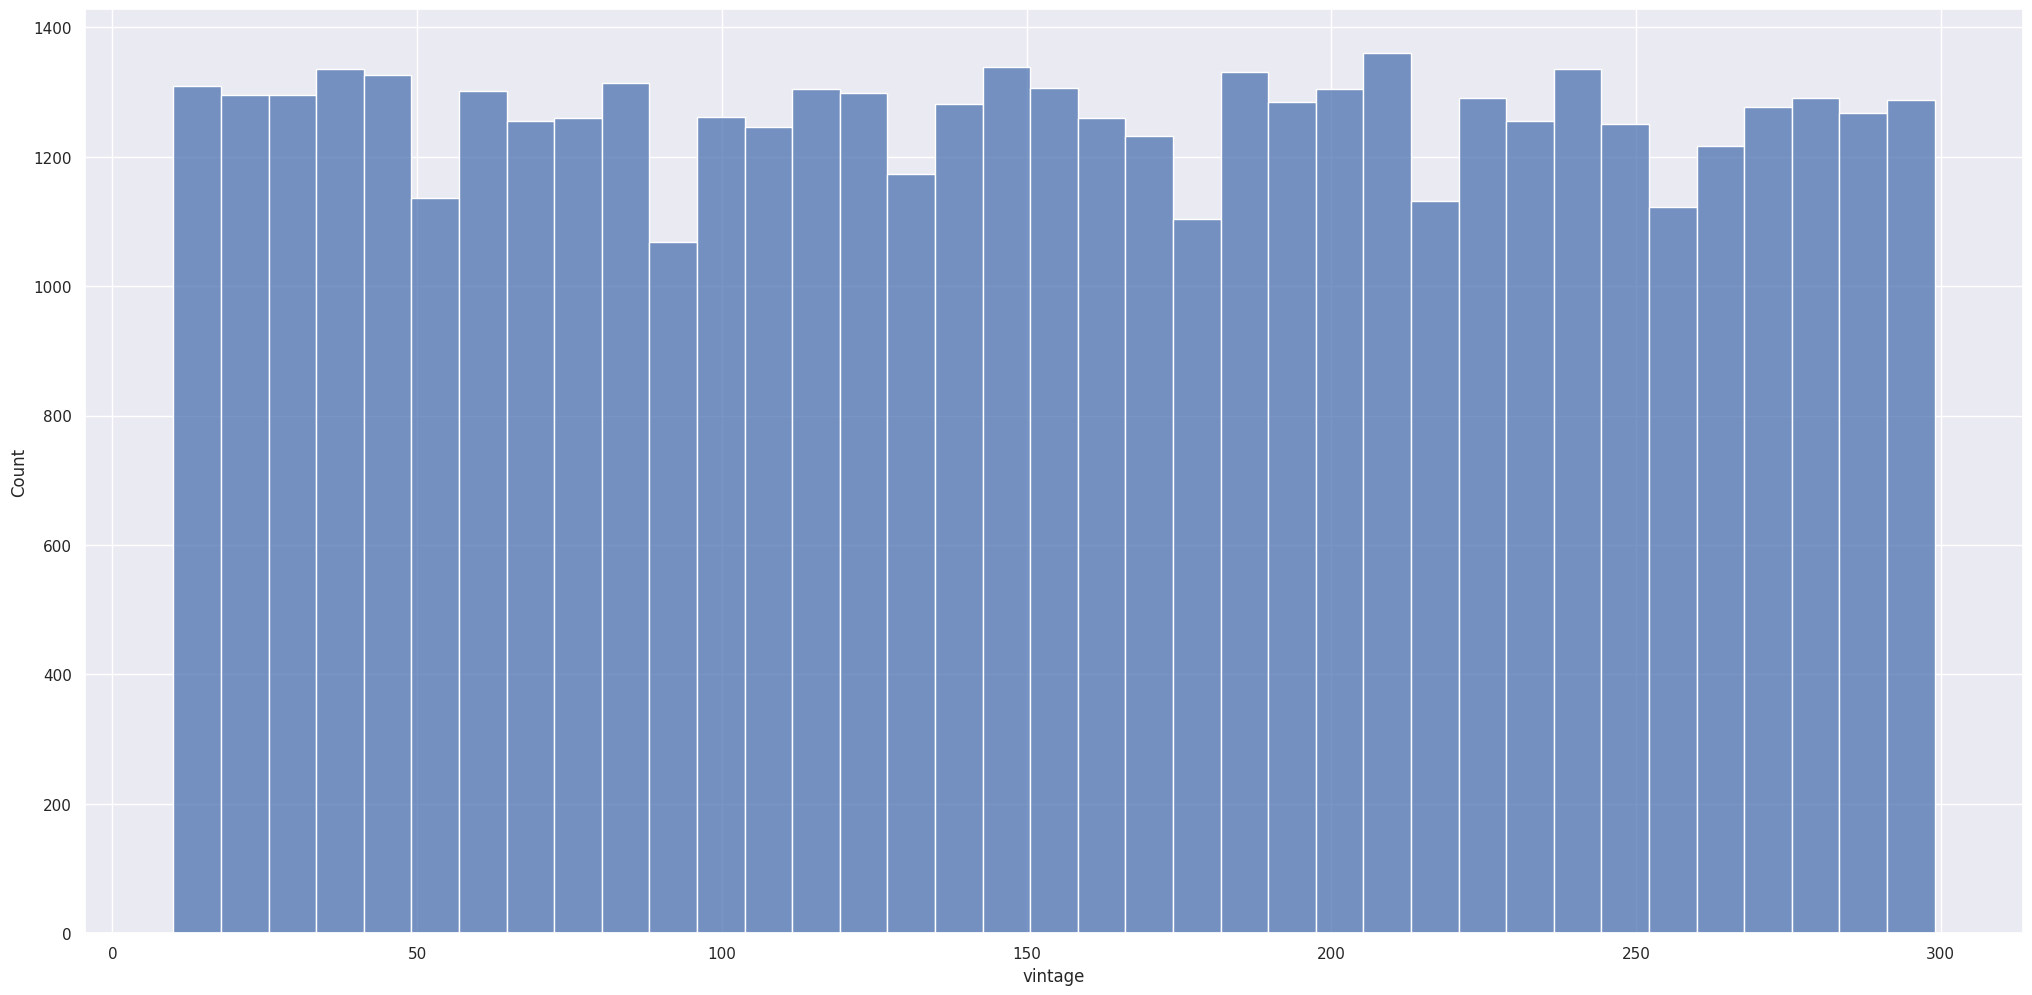

In [64]:
aux00= df4.loc[df4['response']==1,'vintage']
sns.histplot(aux00)

## 4.2. Bivariate Analysis

1. Customers aged >=40 years are more willing to have car insurance.
2. Customers who already have vehicle insurance are not interested in new vehicle insurance.
3. Customers who have had a vehicle for less than 1 year should want vehicle insurance more than customers who have owned a vehicle for longer.
4. Customers who have been associated with the company for a long time may want car insurance.
5. Clients who damaged their cars are more likely to want the insurance.
6. Woman are most likely to want a vehicle insurance.
7. Customers who have region code 28 may want car insurance more than other regions.
8. Customers who have policy_sales_channel = 152 may want car insurance more than other policy_sales_channel
9. People with +40k annual premium should want the insurance

### H1 - Customers aged >=40 years are more willing to have car insurance.
#### False

In [65]:
df4.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,over_2_years,1,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,between_1_2_years,0,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,over_2_years,1,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,below_1_year,0,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,below_1_year,0,27496.0,152.0,39,0


/tmp/ipykernel_61104/1792134824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux1['response']  = aux1['response'].map({1: 'Yes', 0: 'No'})
/tmp/ipykernel_61104/1792134824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux2['response']  = aux2['response'].map({1: 'Yes', 0: 'No'})


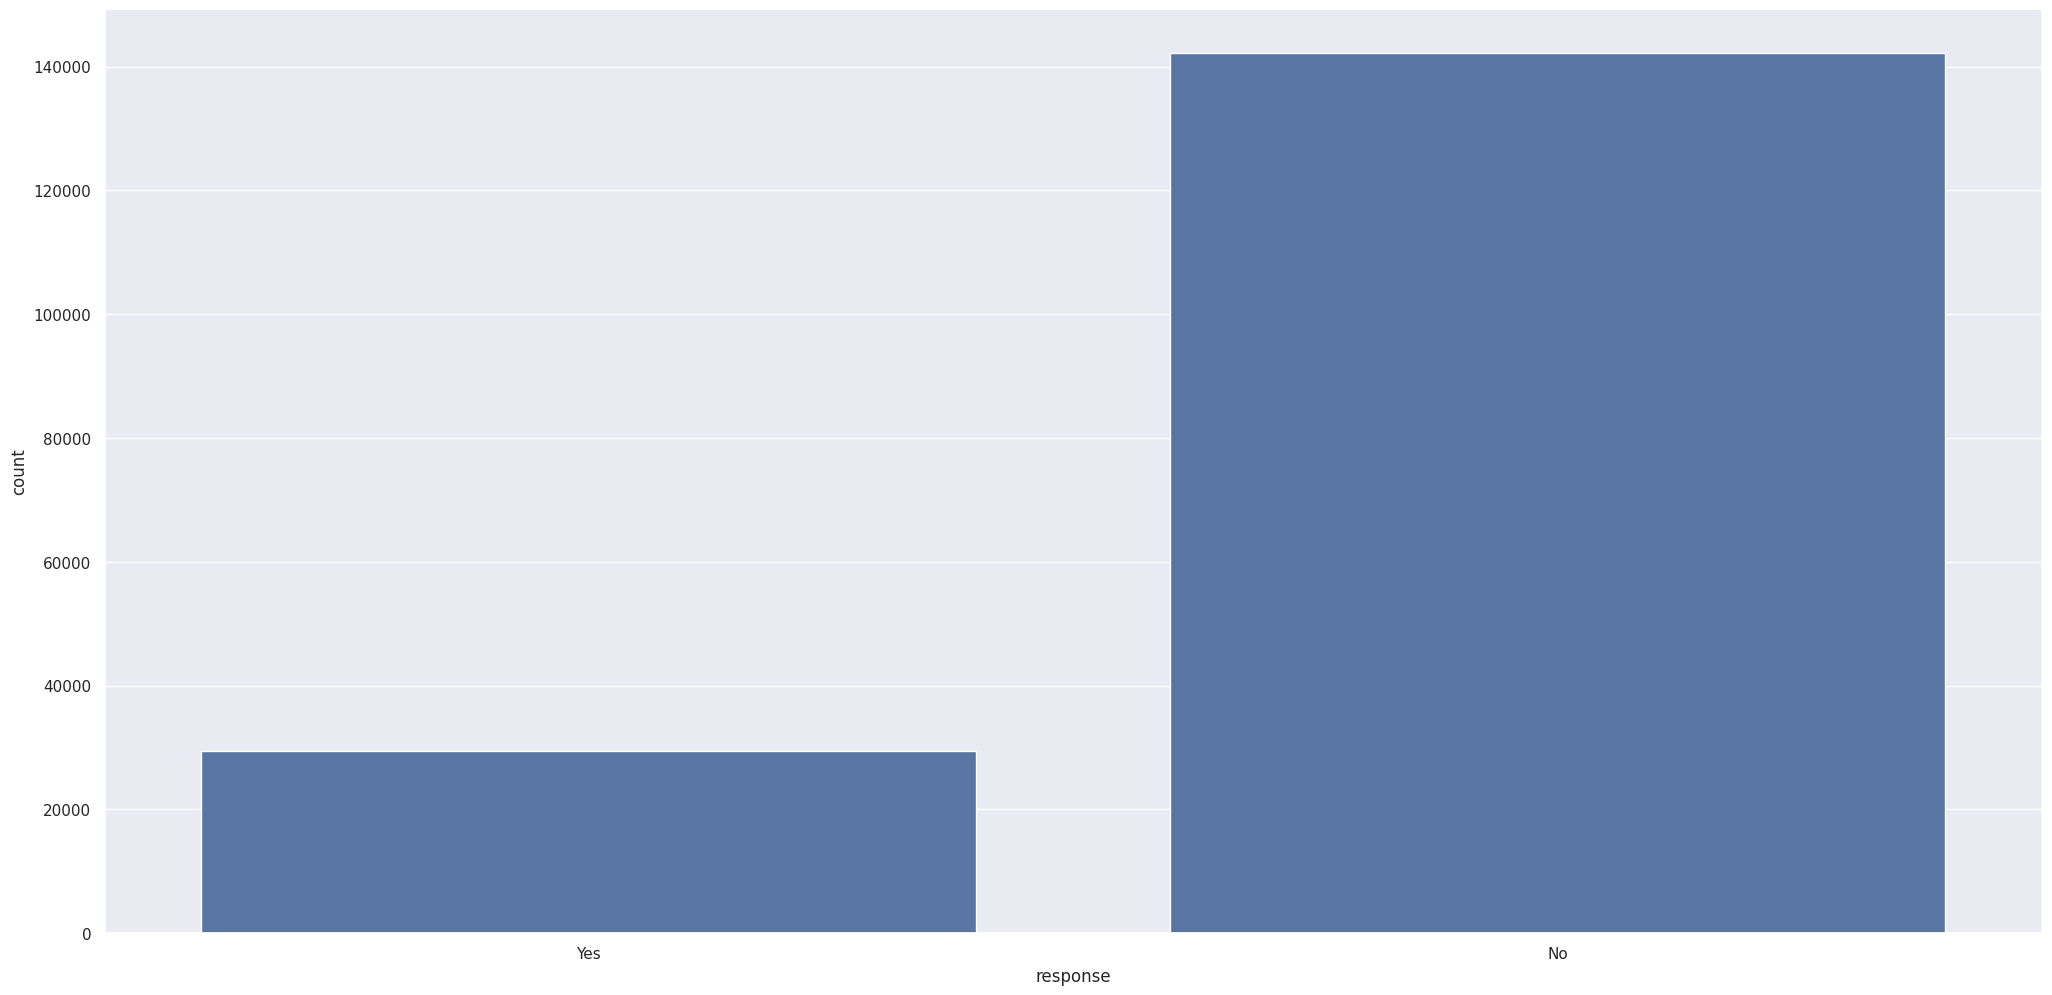

In [66]:
aux1 = df4[df4['age'] >= 40]
aux2 = df4[df4['age'] < 40]
aux1['response']  = aux1['response'].map({1: 'Yes', 0: 'No'})
aux2['response']  = aux2['response'].map({1: 'Yes', 0: 'No'})
aux1.head()
sns.countplot(x ='response', data = aux1)
plt.show()


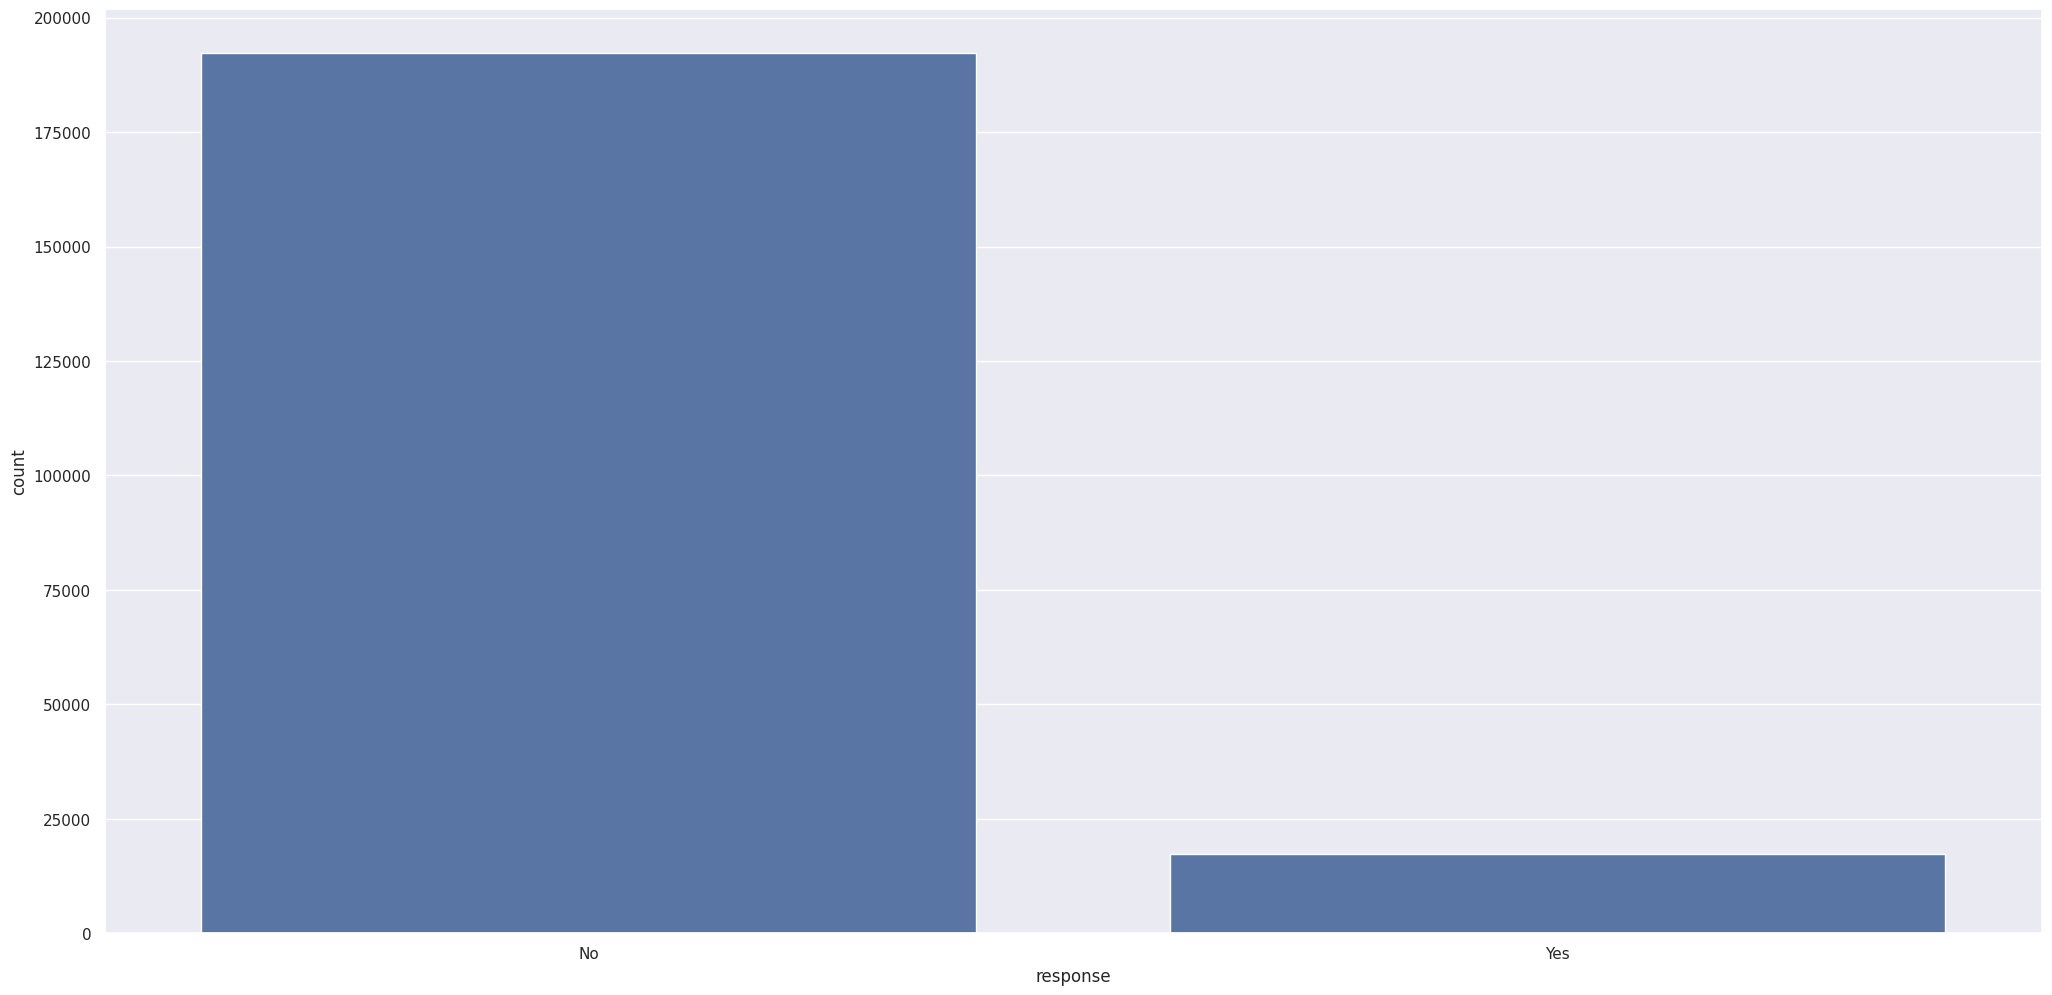

In [67]:
sns.countplot(x ='response', data = aux2)
plt.show()

### H2 - Customers who already have vehicle insurance are not interested in new vehicle insurance.
#### True

/tmp/ipykernel_61104/3496813032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux1['response']  = aux1['response'].map({1: 'Yes', 0: 'No'})


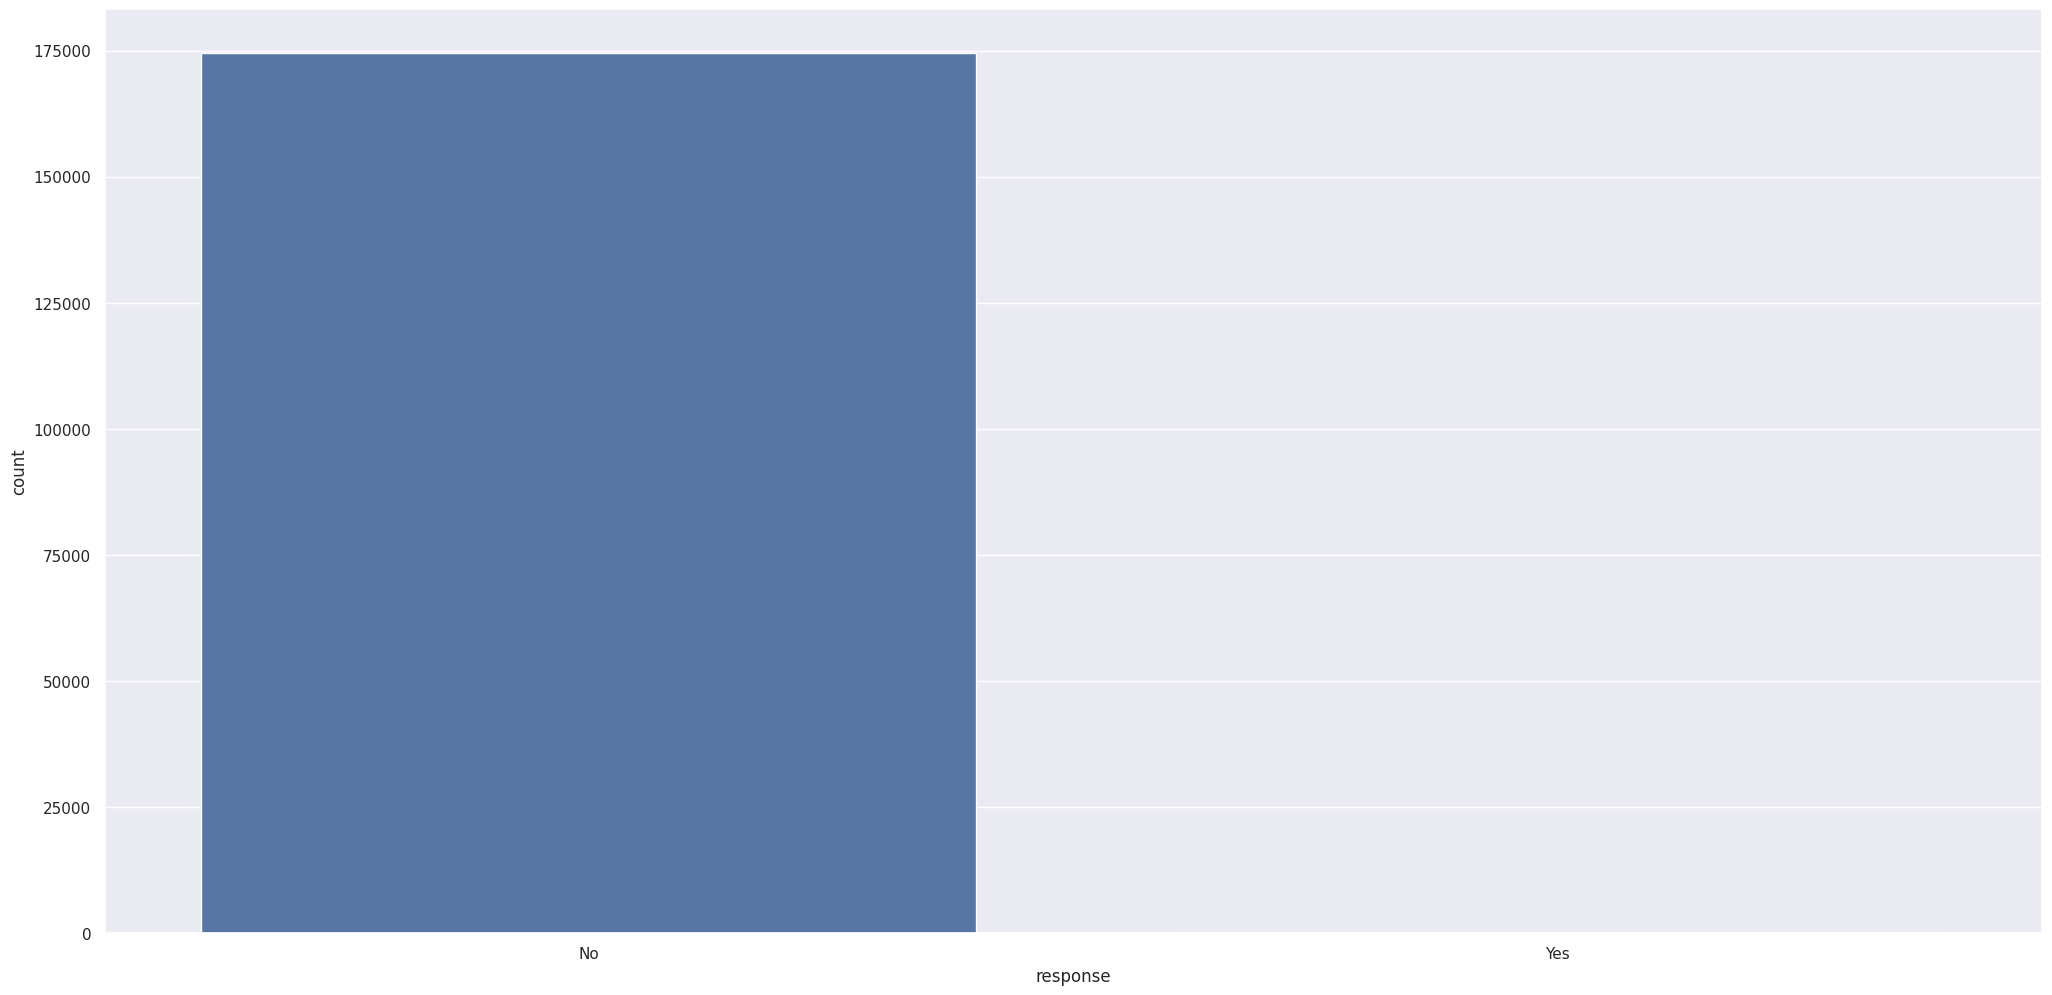

In [68]:
aux1 = df4[df4['previously_insured'] == 1]
aux1['response']  = aux1['response'].map({1: 'Yes', 0: 'No'})
aux1.head()
sns.countplot(x ='response', data = aux1)
plt.show()

### H3 - Customers who have had a vehicle for less than 1 year should want vehicle insurance more than customers who have owned a vehicle for longer.
#### False

/tmp/ipykernel_61104/377384990.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df1, y = 'vehicle_age', palette='colorblind',orient='y');


[Text(0, 0, '43.2%')]

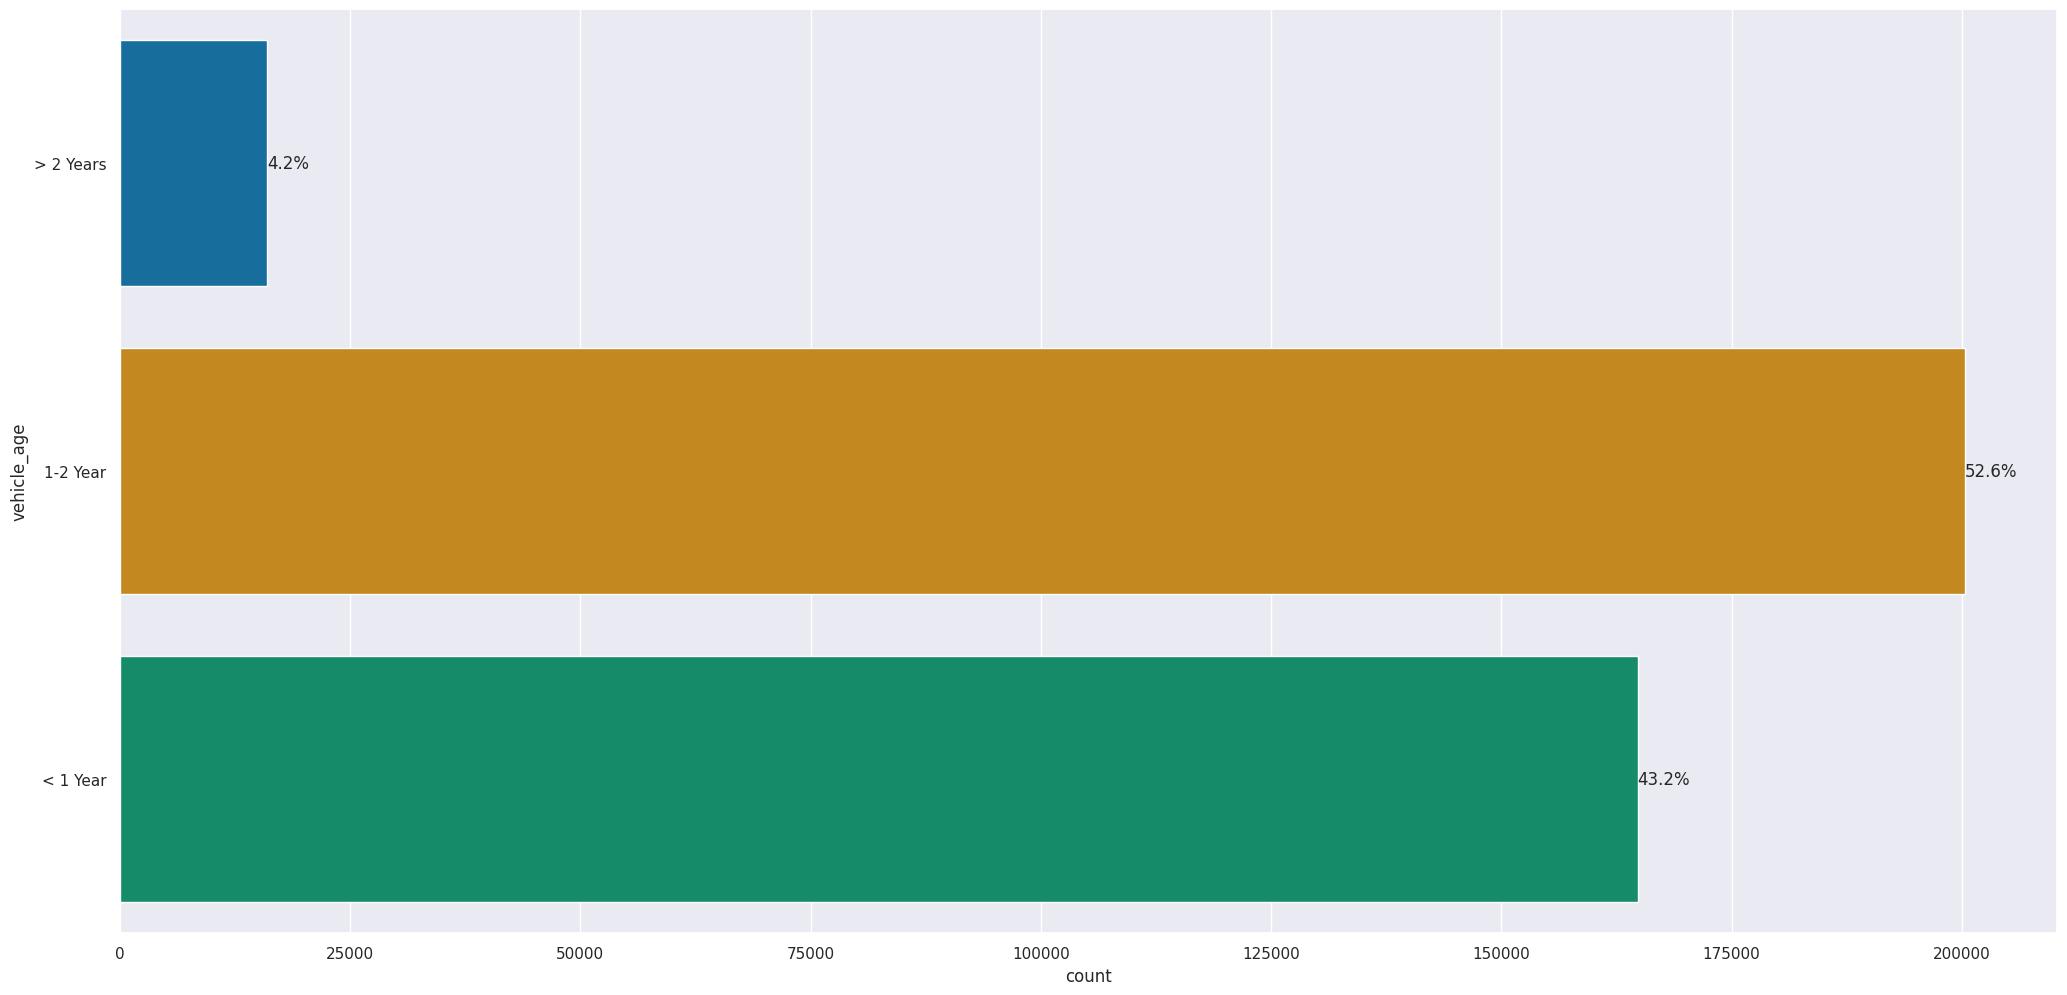

In [69]:
ax = sns.countplot(data = df1, y = 'vehicle_age', palette='colorblind',orient='y');
total = df1['response'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
ax.bar_label(ax.containers[1], fmt=lambda x: f'{(x/total)*100:0.1f}%')
ax.bar_label(ax.containers[2], fmt=lambda x: f'{(x/total)*100:0.1f}%')

### H4 - Customers who have been associated with the company for a long time may want car insurance.
#### False

<Axes: xlabel='vintage', ylabel='Count'>

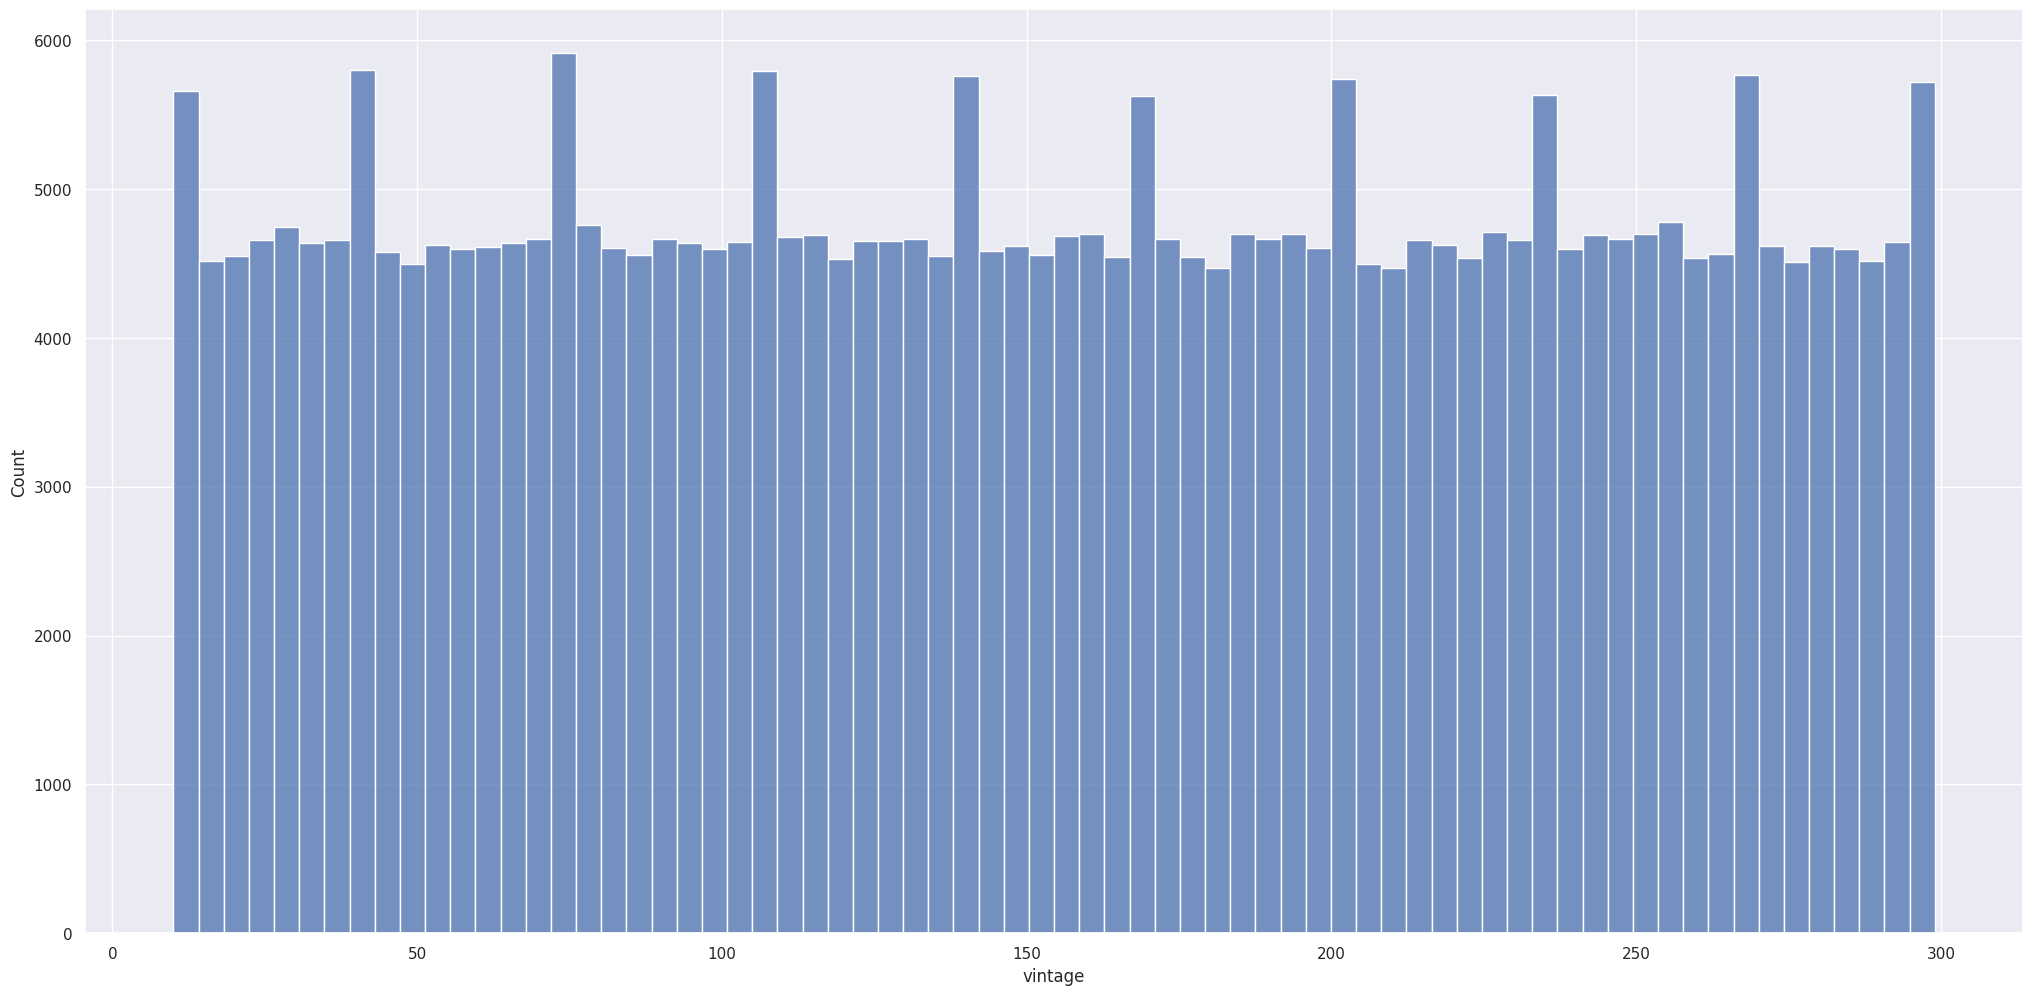

In [70]:
aux00= df4.loc[df4['response']==0,'vintage']
sns.histplot(aux00)

<Axes: xlabel='vintage', ylabel='Count'>

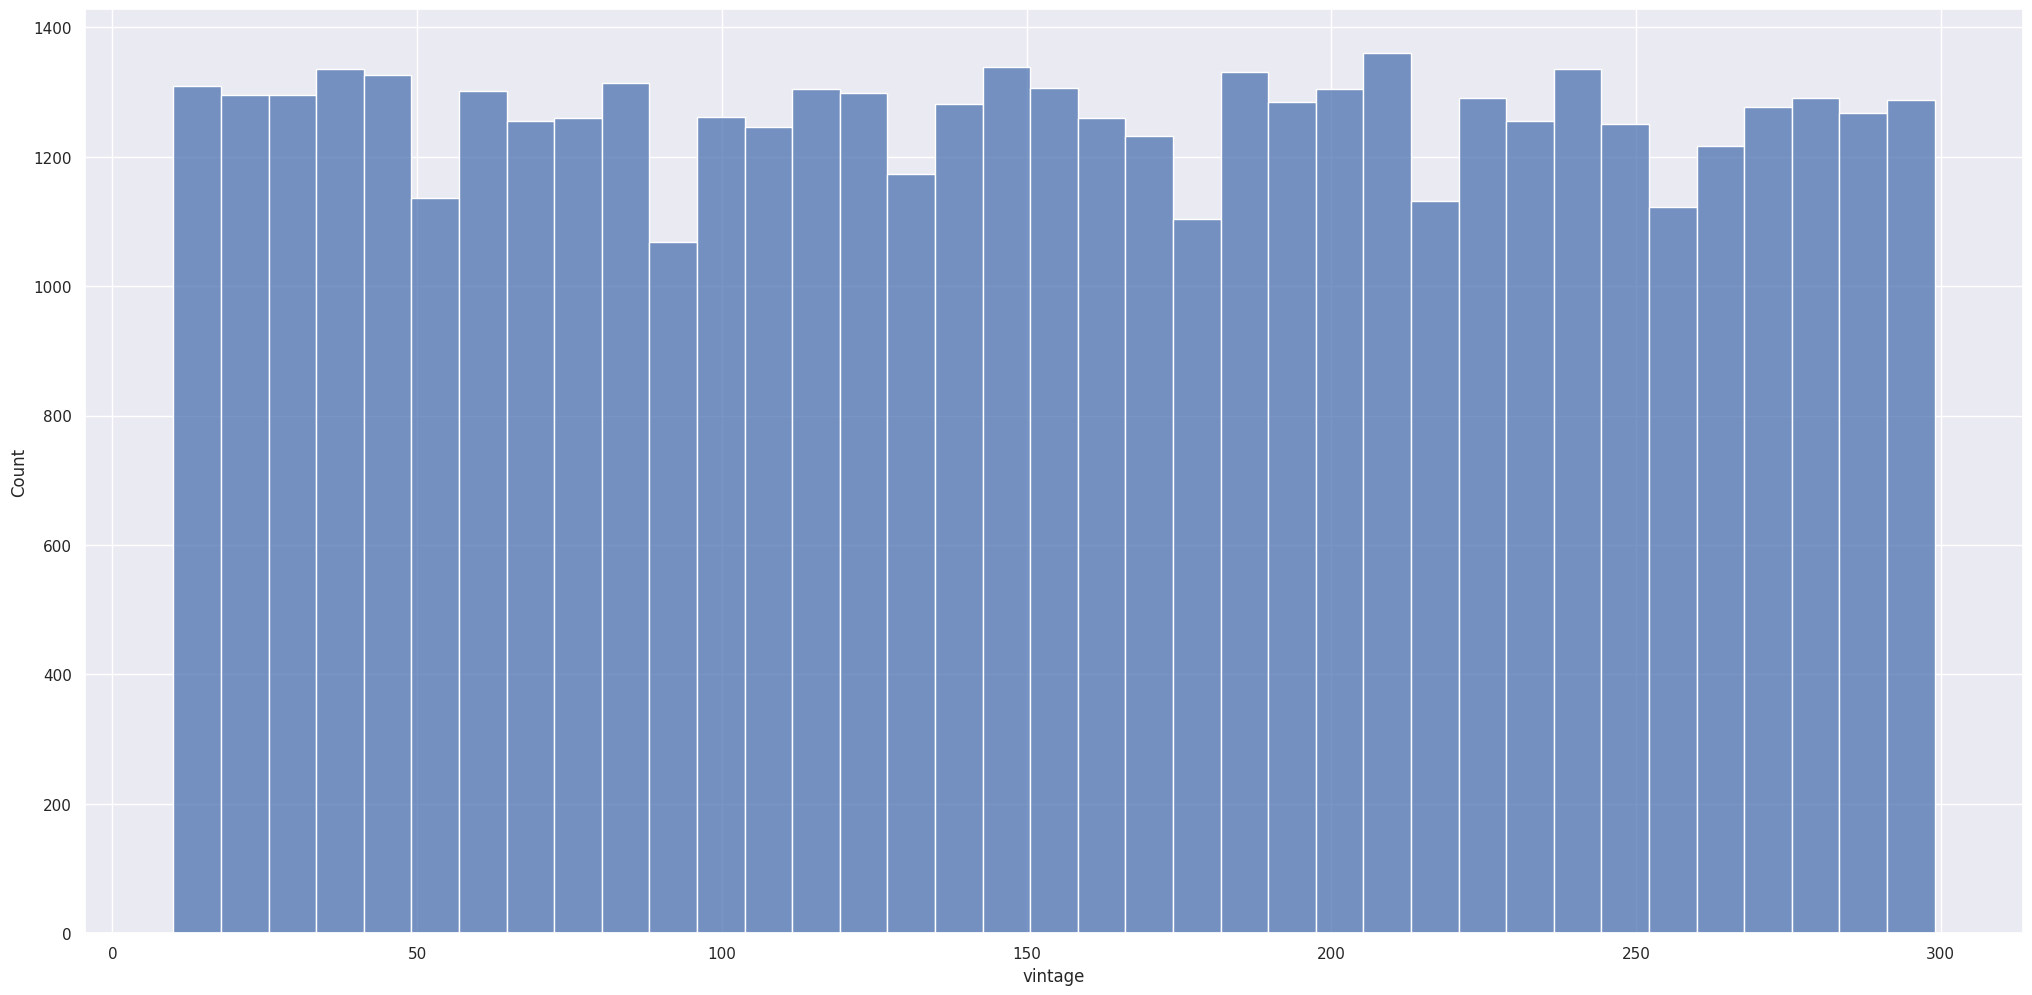

In [71]:
aux00= df4.loc[df4['response']==1,'vintage']
sns.histplot(aux00)

### H5 - Clients who damaged their cars are more likely to want the insurance.
#### True

/tmp/ipykernel_61104/3163466708.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df1, y = 'vehicle_damage', palette='colorblind',orient='y',);


[Text(0, 0, '49.5%')]

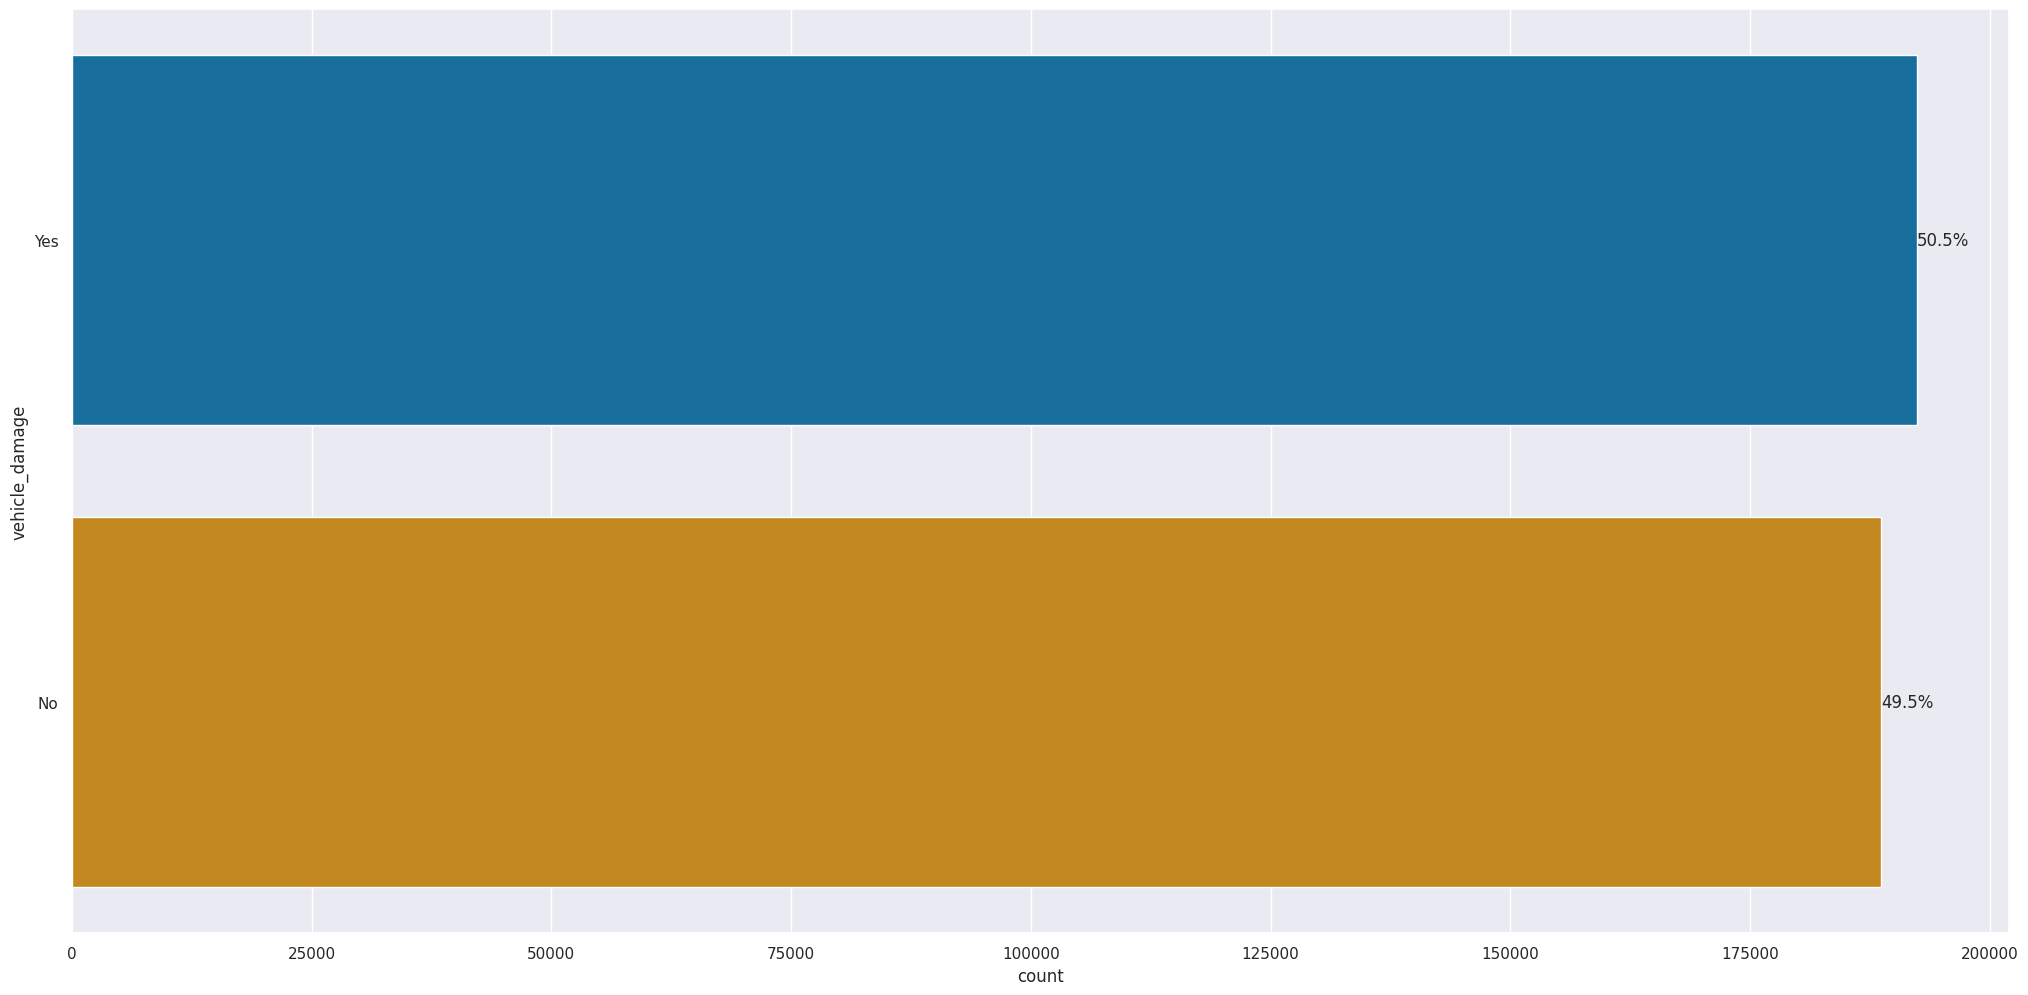

In [72]:
ax = sns.countplot(data = df1, y = 'vehicle_damage', palette='colorblind',orient='y',);
total = df1['response'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
ax.bar_label(ax.containers[1], fmt=lambda x: f'{(x/total)*100:0.1f}%')

### H6 - Woman are most likely to want a vehicle insurance.
#### False

/tmp/ipykernel_61104/5693904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux1['response']  = aux1['response'].map({1: 'Yes', 0: 'No'})
/tmp/ipykernel_61104/5693904.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux2['response']  = aux2['response'].map({1: 'Yes', 0: 'No'})


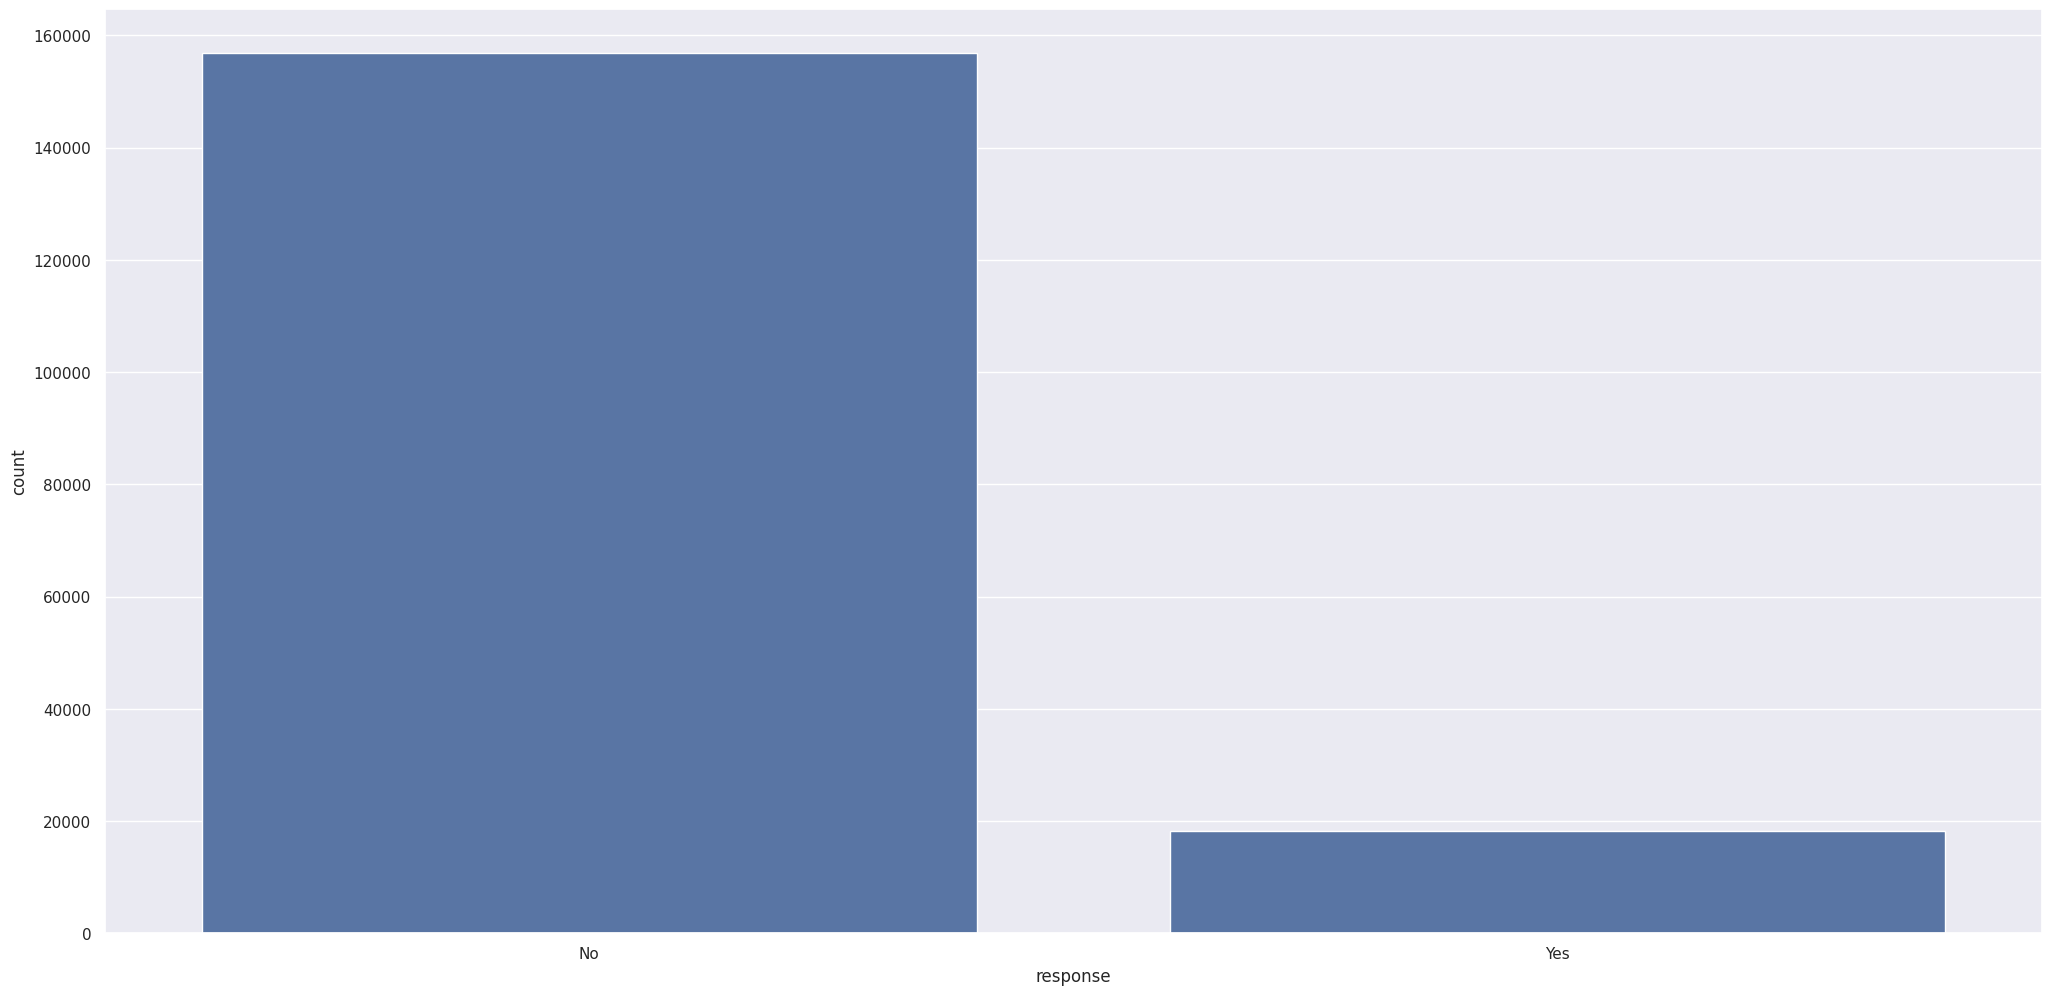

In [73]:
aux1 = df4[df4['gender'] == 'Female']
aux2 = df4[df4['gender'] == 'Male']
aux1['response']  = aux1['response'].map({1: 'Yes', 0: 'No'})
aux2['response']  = aux2['response'].map({1: 'Yes', 0: 'No'})
aux1.head()
sns.countplot(x ='response', data = aux1)
plt.show()


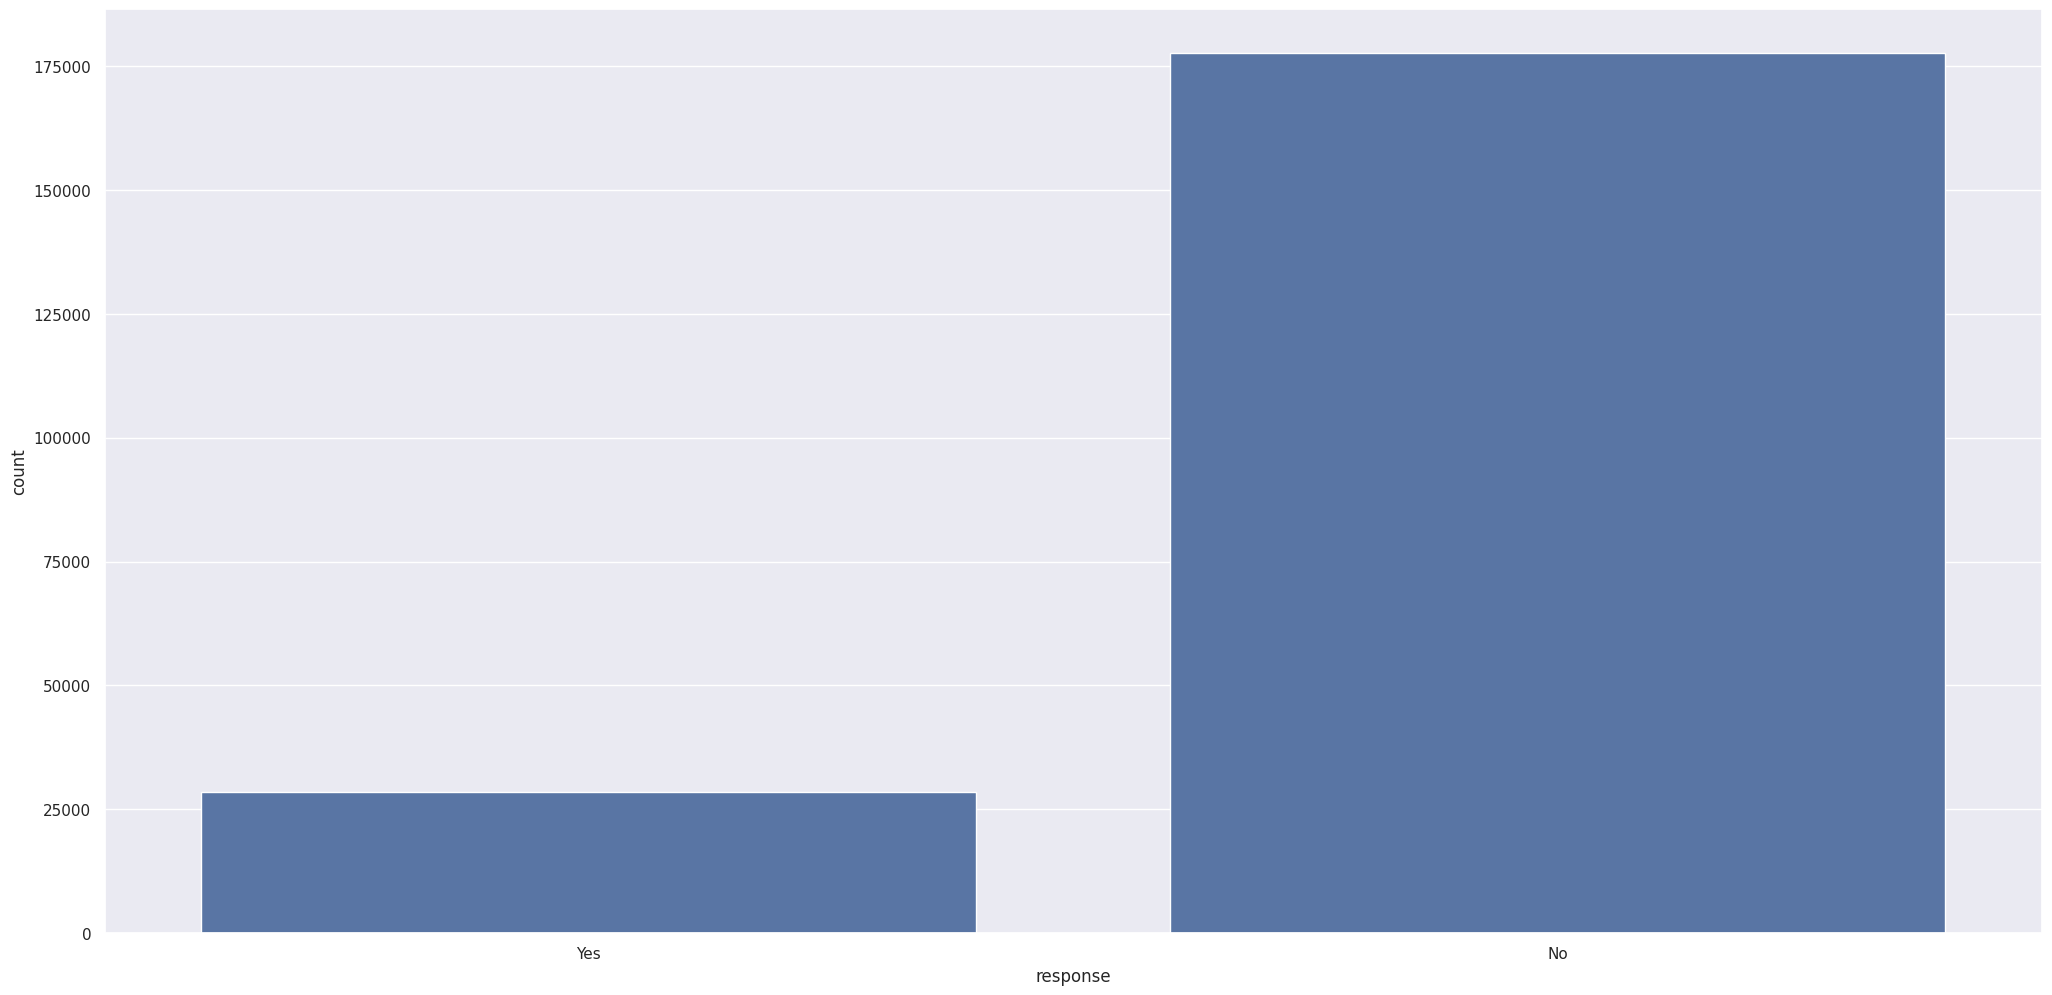

In [74]:
sns.countplot(x ='response', data = aux2)
plt.show()

# 5.0. DATA PREPARATION

In [75]:
df5 = df4.copy()

In [76]:
df5.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

<Axes: xlabel='age', ylabel='Count'>

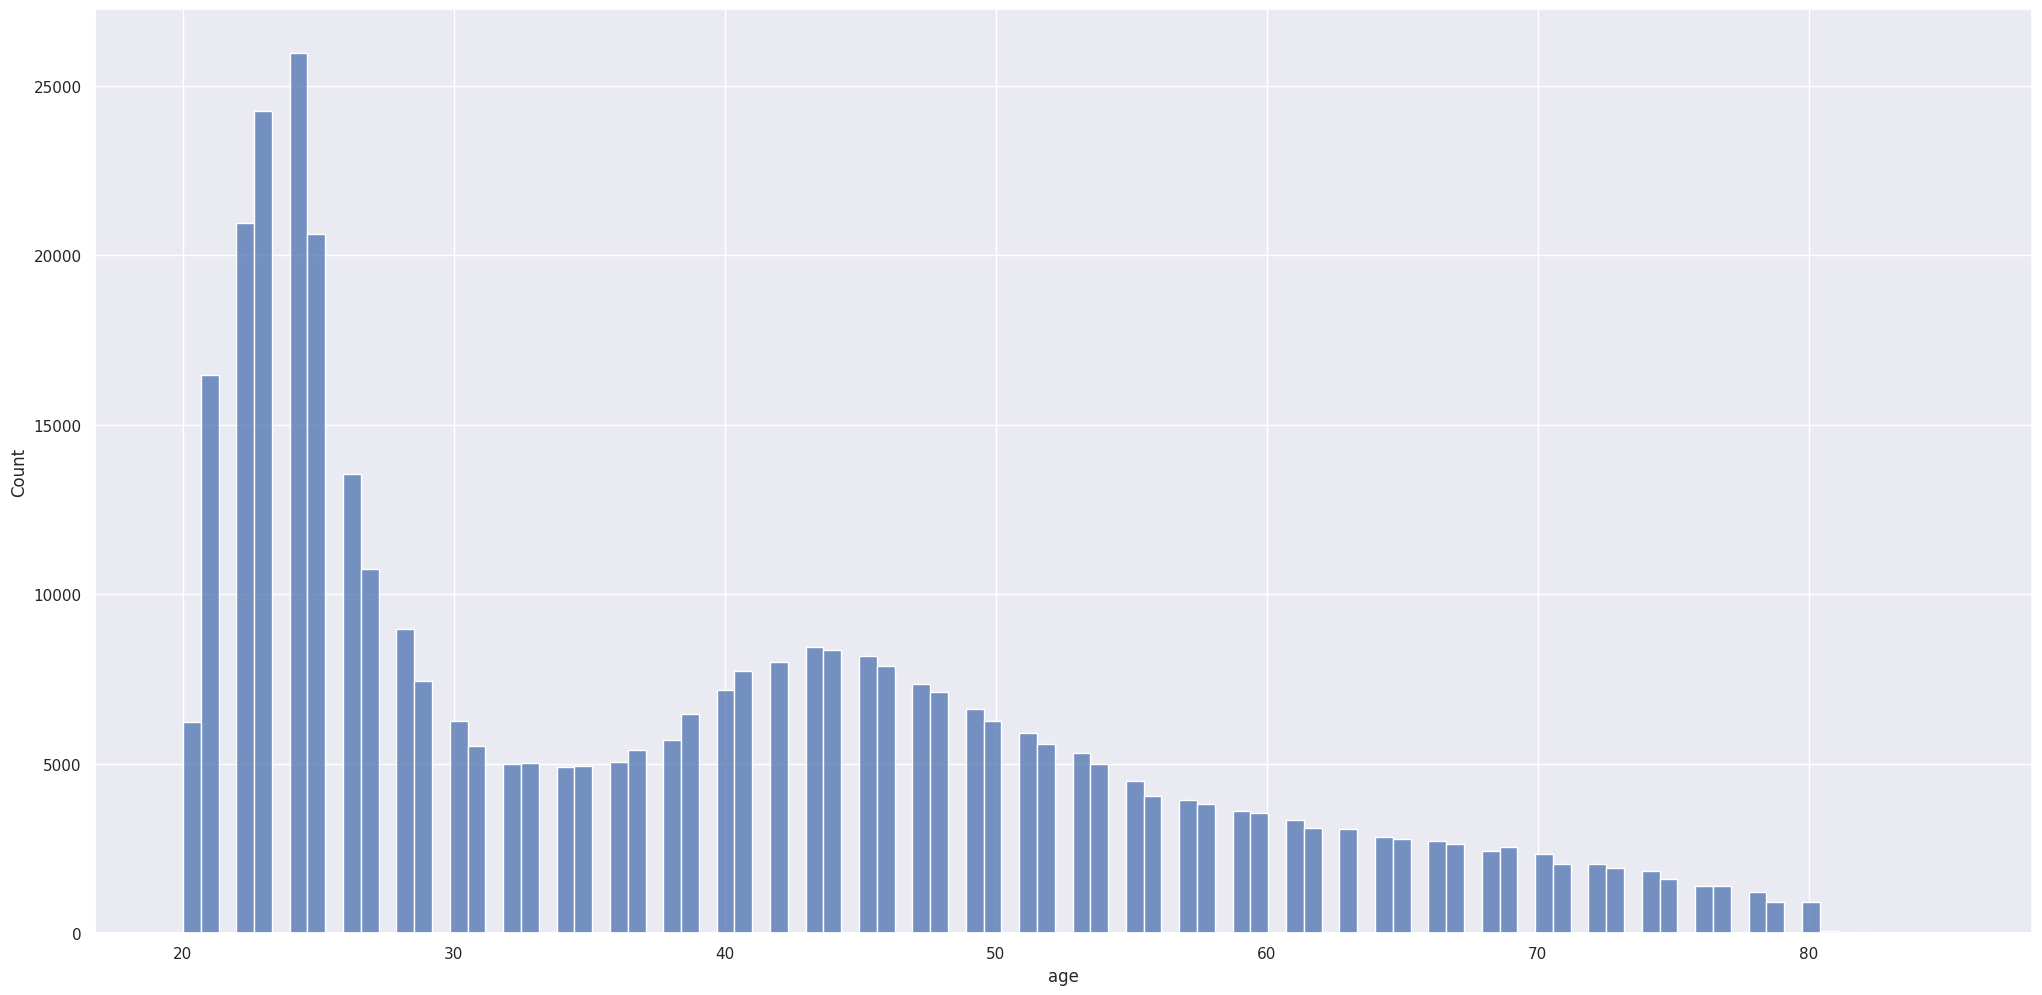

In [77]:
sns.histplot(df5['age'])

In [78]:
#Split of DF in train and test
X = df4.drop('response', axis=1)
y = df4['response'].copy()

x_train, x_val, y_train, y_val = ms.train_test_split (X, y, test_size = 0.20)

df5 = pd.concat ([x_train, y_train], axis=1)

## Standartization

In [79]:
ss = pp.StandardScaler()

# annual_premium
#colchetes duplos e metodo values para pegar o valor em forma de um array dentro do fit transformer
df5['annual_premium'] = ss.fit_transform (df5[['annual_premium']].values)

## Rescaling

In [80]:
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()
# age
df5['age'] = mms_age.fit_transform(df5[['age']].values) 
# vintage
df5['vintage'] = mms_vintage.fit_transform(df5[['vintage']].values) 

## Enconder

In [81]:
# ----vars yes/no-------

# driving_licence - (no need encode it is already in 0/1)

#gender - One Hot Encoding / Target Encoding
target_encode_gender = df5.groupby ('gender')['response'].mean()
df5.loc[:,'gender'] = df5['gender'].map(target_encode_gender)
df5.head()


# region_code - Frequency encoding / Target encoding / Weighted Terget Enconding
#Escolhido Target encoding
target_encode_region_code = df5.groupby ('region_code')['response'].mean()
#target_encode_region_code.head()
df5.loc[:,'region_code'] = df5['region_code'].map(target_encode_region_code)
df5.head()

# previously_insured - no need encode it is already in 0/1)

# vehicle_age - One Hot Enconding / Order Enconding  / Frequency encoding -
#Escolhido One Hot Enconding
#Get dummies passa a columna que quero e devolve o DF inteiro para sustentar o one hot encode
df5 = pd.get_dummies(df5,prefix = 'vehicle_age', columns =['vehicle_age'])

# vehicle_damage - no need encode it is already in 0/1)

# policy_sales_channel - Frequency encoding / Target encoding 
#frequency encoding
fe_policy_sales_channel = df5.groupby('policy_sales_channel').size() / len(df5)
df5.loc[:,'policy_sales_channel'] = df5 ['policy_sales_channel'].map(fe_policy_sales_channel)

#


In [82]:
df5.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,vehicle_age_below_1_year,vehicle_age_between_1_2_years,vehicle_age_over_2_years
131568,131569,0.138457,0.015385,1,0.067723,0,1,1.695898,0.057215,0.404844,0,True,False,False
115681,115682,0.138457,0.369231,1,0.095813,0,1,0.524625,0.209245,0.096886,0,False,False,True
24862,24863,0.103626,0.353846,1,0.187482,0,1,-1.612954,0.027863,0.370242,0,False,False,True
362939,362940,0.138457,0.184615,1,0.187482,0,1,-1.612954,0.193675,0.782007,1,True,False,False
158544,158545,0.138457,0.061538,1,0.187482,1,0,1.130695,0.354062,0.249135,0,True,False,False


## 5.4. Validation Preparation

In [83]:
#gender
x_val.loc[:, 'gender'] = x_val.loc[:, 'gender'].map(target_encode_gender)

#age
x_val.loc[:, 'age'] = mms_age.transform(x_val[['age']].values)

#region_code
x_val.loc[:, 'region_code'] = x_val.loc[:, 'region_code'].map(target_encode_region_code)

#vehicle_age
x_val = pd.get_dummies(x_val,prefix='vehicle_age',columns=['vehicle_age'])

#annual_premium
x_val.loc[:,'annual_premium'] = ss.transform(x_val[['annual_premium']].values)

#policy_sales_channel
x_val.loc[:, 'policy_sales_channel'] = x_val['policy_sales_channel'].map(fe_policy_sales_channel)

#vintage
x_val.loc[:,'vintage'] = mms_vintage.transform(x_val[['vintage']].values)

#fillna
x_val = x_val.fillna(0)


/tmp/ipykernel_61104/2883961187.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.04615385 0.07692308 0.04615385 ... 0.43076923 0.06153846 0.12307692]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_val.loc[:, 'age'] = mms_age.transform(x_val[['age']].values)
/tmp/ipykernel_61104/2883961187.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.816609   0.94117647 0.22145329 ... 0.30103806 0.37716263 0.5916955 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_val.loc[:,'vintage'] = mms_vintage.transform(x_val[['vintage']].values)
/tmp/ipykernel_61104/2883961187.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to th

# 6.0. FEATURE SELECTION

## 6.2. Features Importancia

In [85]:
# botura gerou 2 features apenas , vai ser usado esse metodo de arvore para definir as importancias
# model definitions

forest = en.ExtraTreesClassifier(n_estimators=250, random_state=0,n_jobs=-1)

#data_preparation
x_train_n = df5.drop(['id','response'],axis=1)
y_train_n = y_train.values
forest.fit(x_train_n,y_train_n)

ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

Feature ranking:
                         feature  importance
0                        vintage    0.272148
0                 annual_premium    0.244887
0                            age    0.166500
0                    region_code    0.105247
0                 vehicle_damage    0.069692
0           policy_sales_channel    0.060312
0             previously_insured    0.054688
0       vehicle_age_below_1_year    0.012904
0  vehicle_age_between_1_2_years    0.006316
0                         gender    0.004610
0       vehicle_age_over_2_years    0.002202
0                driving_license    0.000493


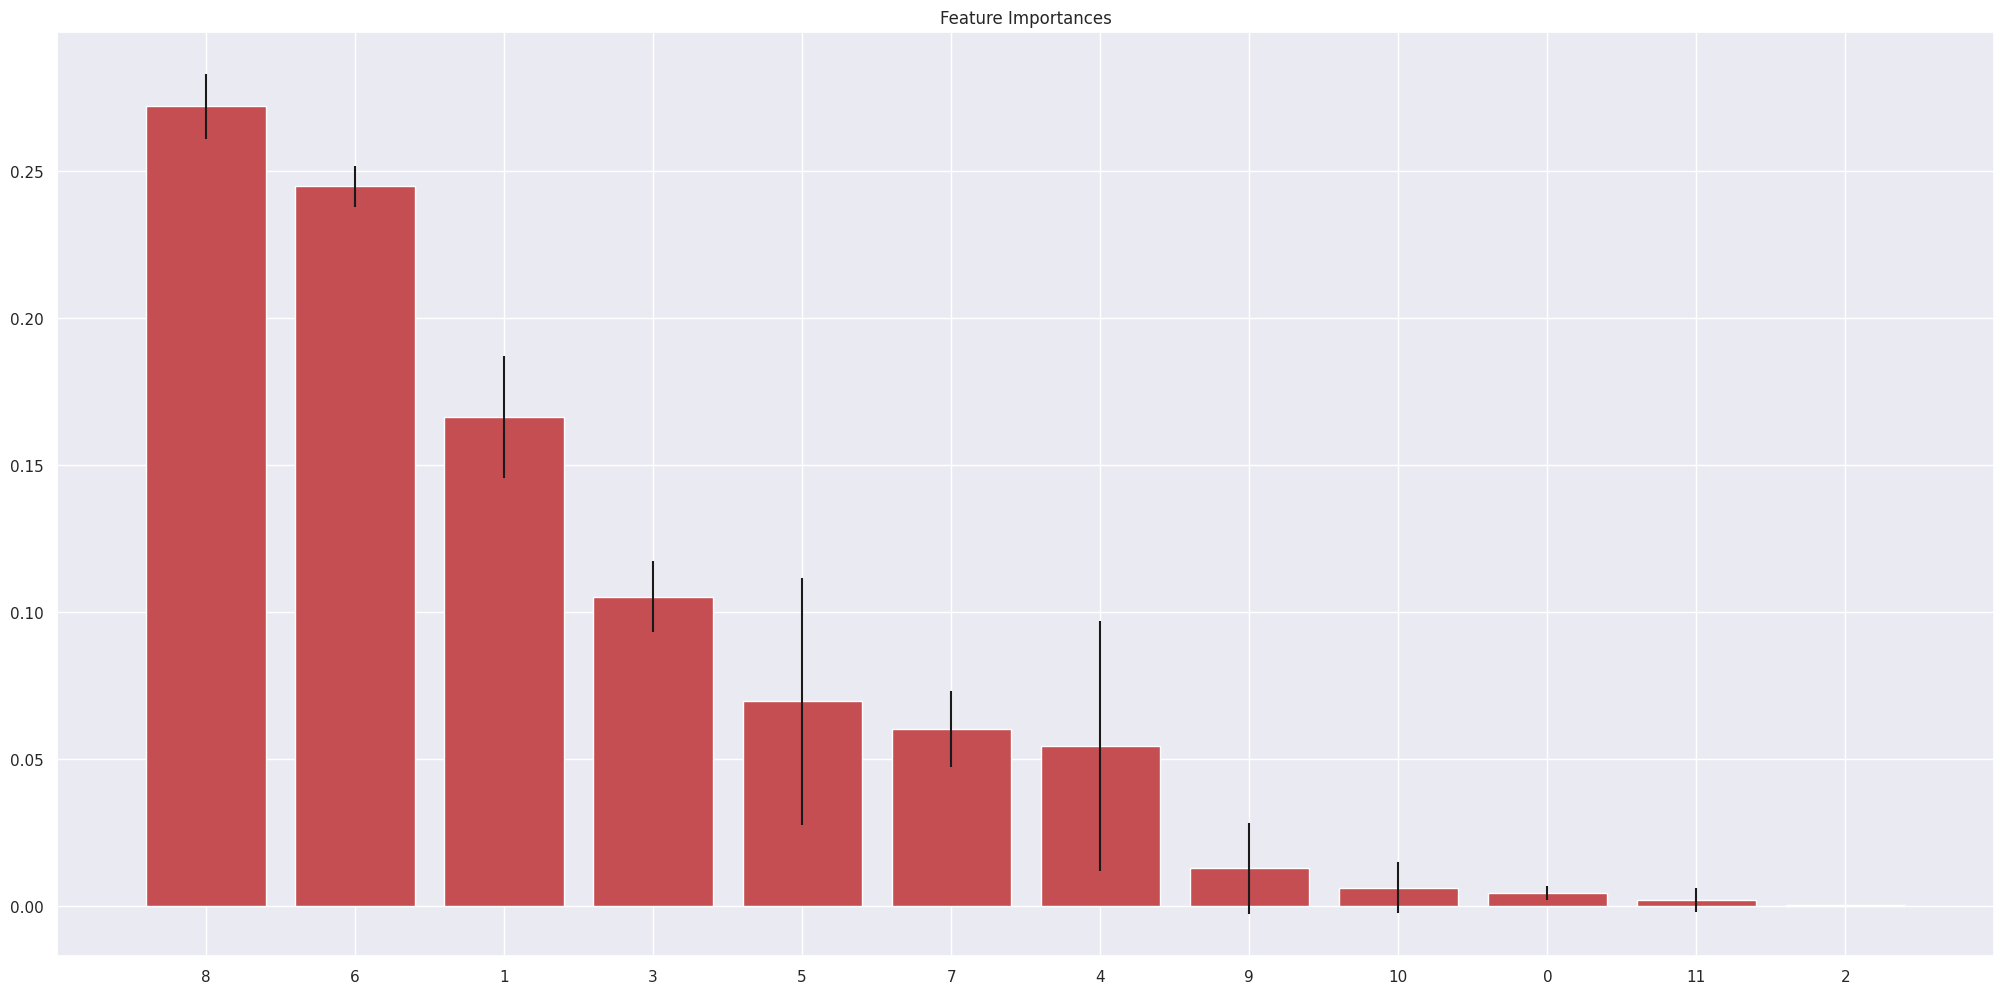

In [88]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

#Print the feature ranking
print("Feature ranking:")
df = pd.DataFrame()
for i,j in zip(x_train_n,forest.feature_importances_):
    aux = pd.DataFrame({'feature':i, 'importance': j}, index=[0])
    df = pd.concat([df,aux],axis=0)
    
print (df.sort_values('importance', ascending=False))
#Plot the impurity based feature importances of the forest
plt.figure()
plt.title("Feature Importances")
plt.bar(range(x_train_n.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train_n.shape[1]),indices)
plt.xlim([-1,x_train_n.shape[1]])
plt.show()

In [95]:
# arbitrariamente pego ate onde encontrar uma maior queda . No caso, vou ficar  com as features abaixo: 

"""
                        feature  importance
0                        vintage    0.272148
0                 annual_premium    0.244887
0                            age    0.166500
0                    region_code    0.105247
0                 vehicle_damage    0.069692
0           policy_sales_channel    0.060312
0             previously_insured    0.054688

"""


'\n                        feature  importance\n0                        vintage    0.272148\n0                 annual_premium    0.244887\n0                            age    0.166500\n0                    region_code    0.105247\n0                 vehicle_damage    0.069692\n0           policy_sales_channel    0.060312\n0             previously_insured    0.054688\n\n'